<a href="https://colab.research.google.com/github/ramoants254/House-Prediction/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## About the Data
* This is a Dataset from Kaggle meant for Computer Scientists to practice their Regrestion Skills
* Its Dataset that aims to predict the future sales Prices for the future

In [218]:
df=pd.read_csv('/content/drive/MyDrive/Regression-Project/train.csv')

## Data Preprocessing
* exploring the dataset

In [219]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [221]:
null_columns=df.isna().mean()*100

In [222]:
null_columns[null_columns>0]

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


## Dropping Columns with more than 50% missing entries

In [223]:
df=df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

## Filling missing values of numerical columns with mean and midium

In [224]:
from sklearn.impute import SimpleImputer

# Fill missing values in numerical columns with mean or median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Use mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

# Use median imputation (if you prefer)
median_imputer = SimpleImputer(strategy='median')
df[num_cols] = median_imputer.fit_transform(df[num_cols])


## Filling missing values on Categorical Columns

In [225]:
# Fill missing values in categorical columns with the mode (most frequent value)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

mode_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = mode_imputer.fit_transform(df[cat_cols])


In [226]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [227]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


In [228]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125.0
1459,1460.0,20.0,RL,75.0,9937.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,WD,Normal,147500.0


In [229]:
df.shape

(1460, 77)

In [230]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [232]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # df=pd.get_dummies(df,drop_first=True)
# # Compute the correlation matrix
# corr_matrix = df.corr()

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Features and Target (Sales Price)')
# plt.show()


## Separeting the Categorical columns and the numerical columns
* Transforming the object columns into categorical

In [233]:
categorical_cols=df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols]=df[categorical_cols].astype('category')
numerical_cols=df.select_dtypes(include=['float64', 'int64']).columns
target=df['SalePrice']
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [234]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Ploting
* Here,i was tring to figure out how both categorical columns and Numeric were related to the SalesPrice column and finding the best way i can transform categorical columns into numerical

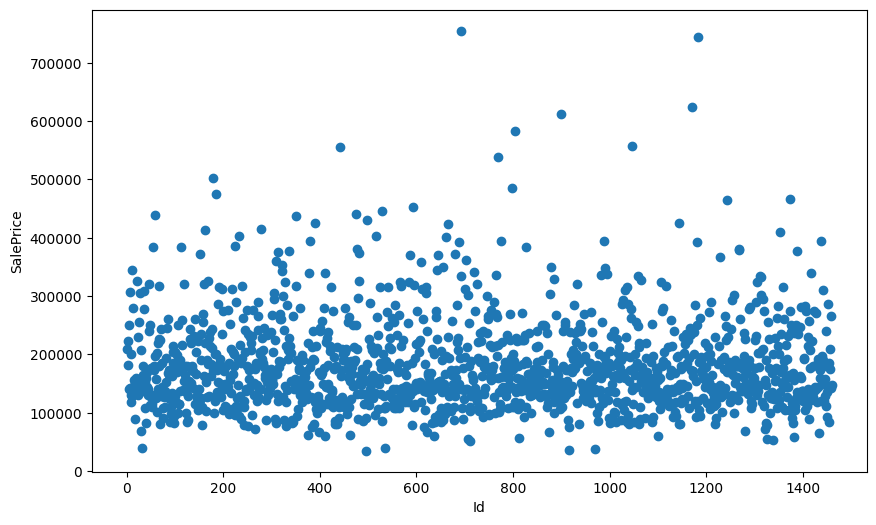

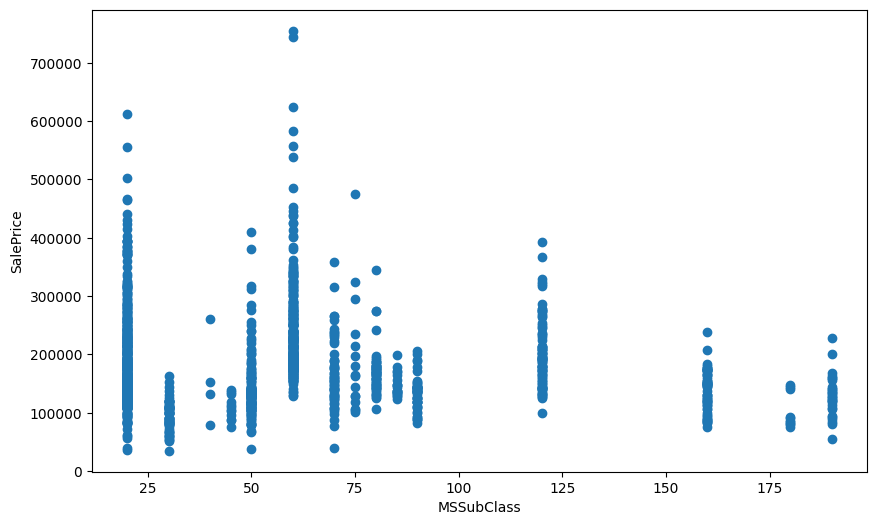

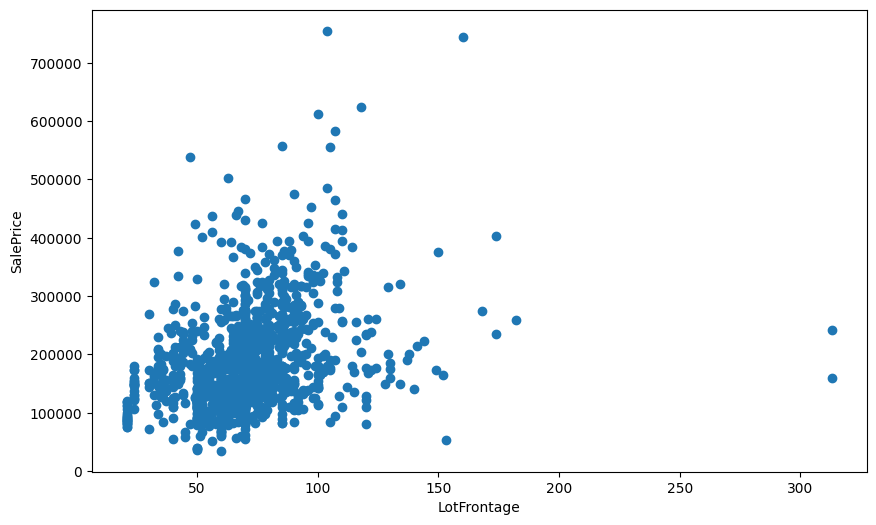

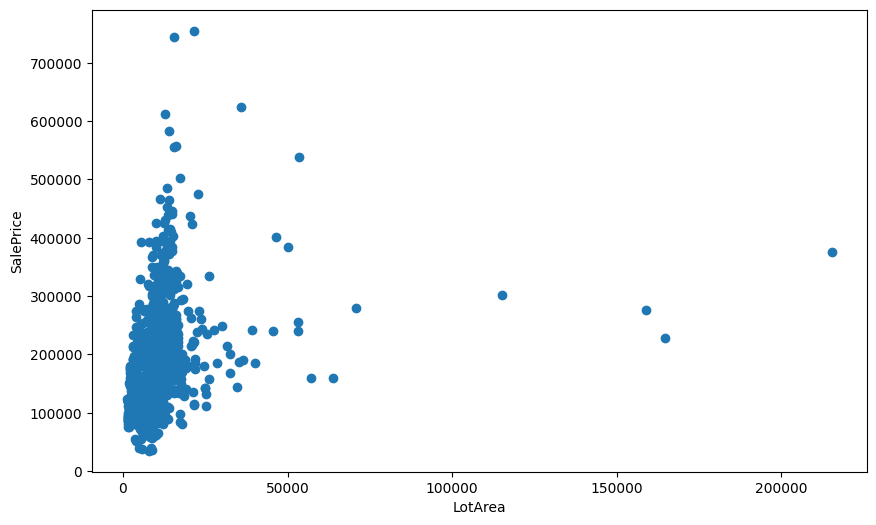

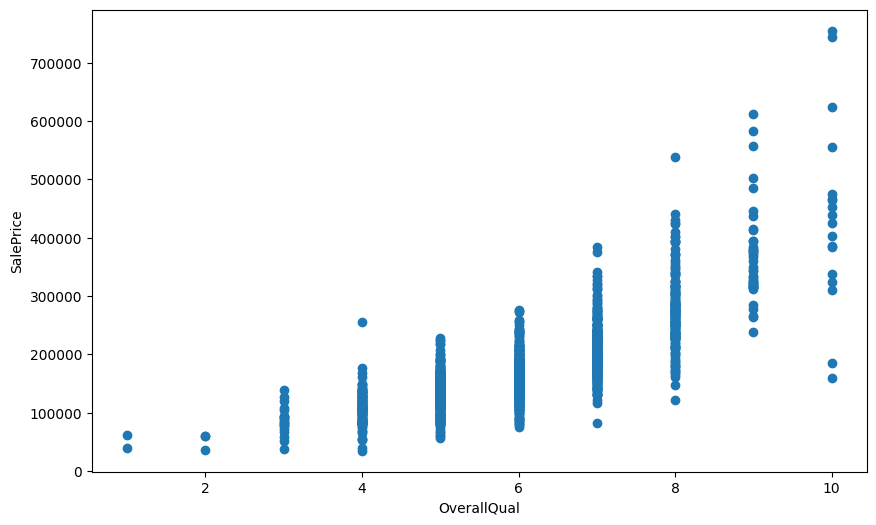

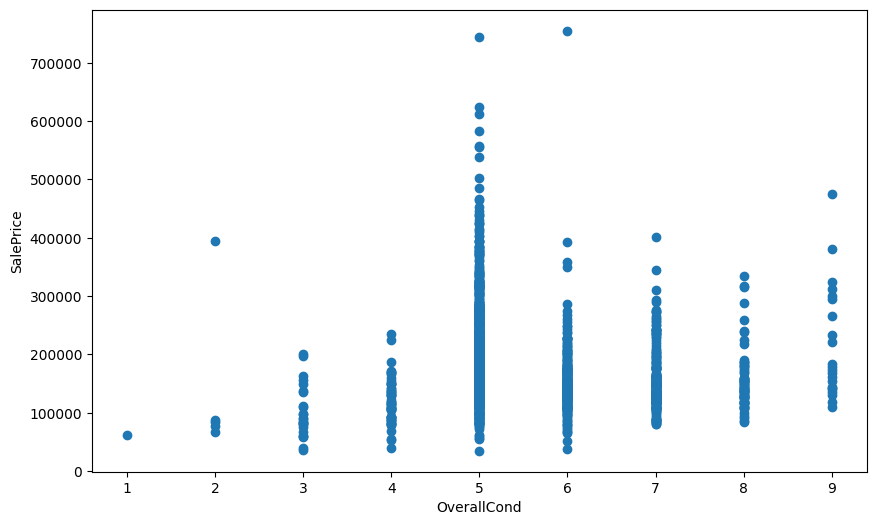

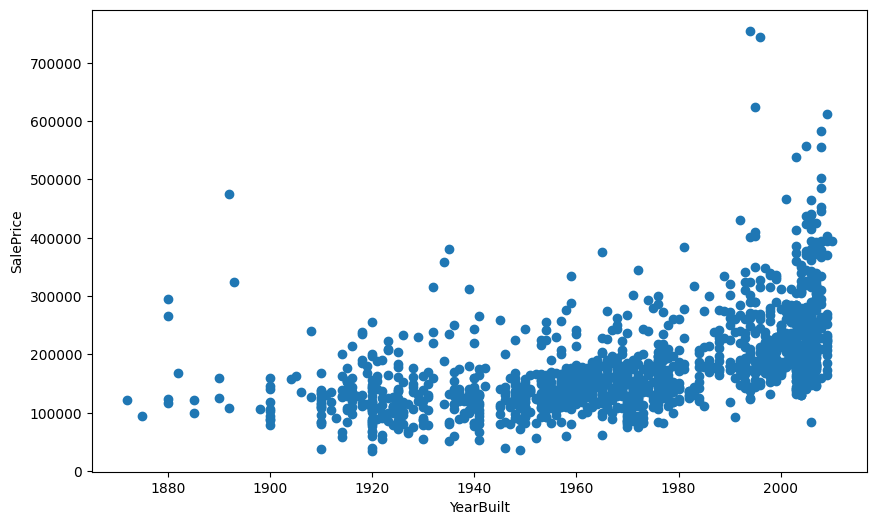

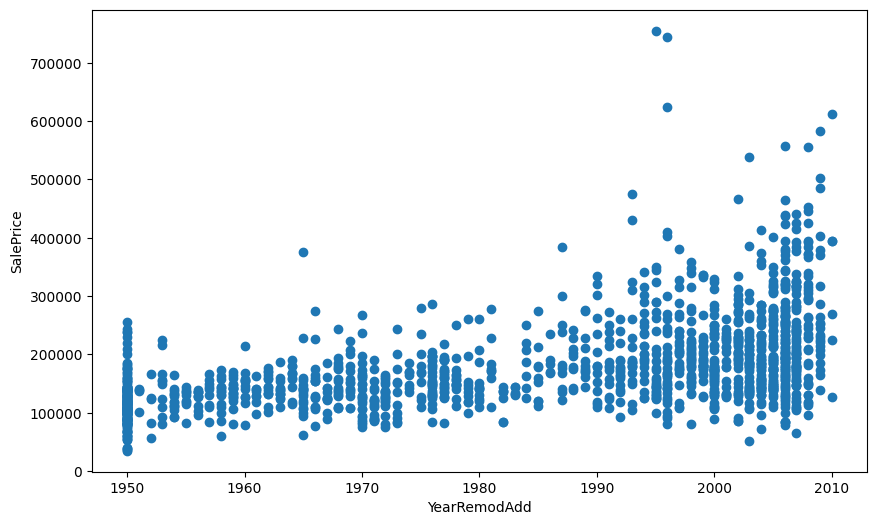

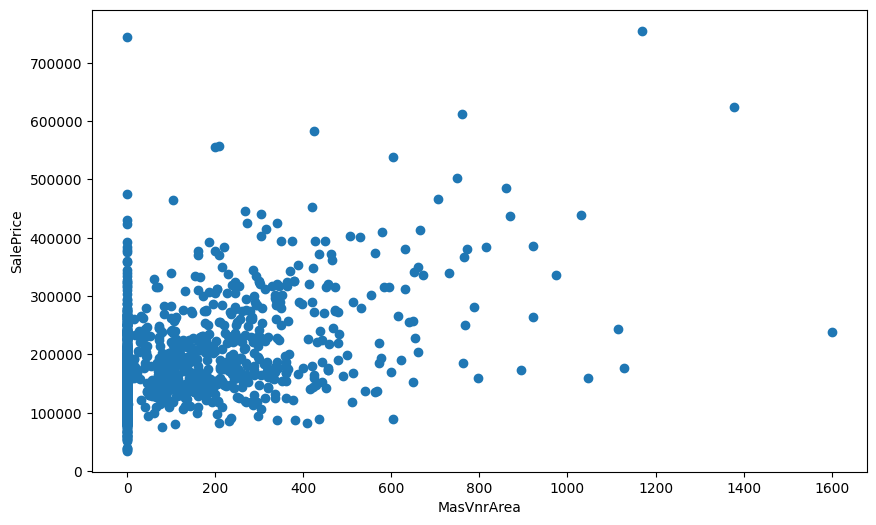

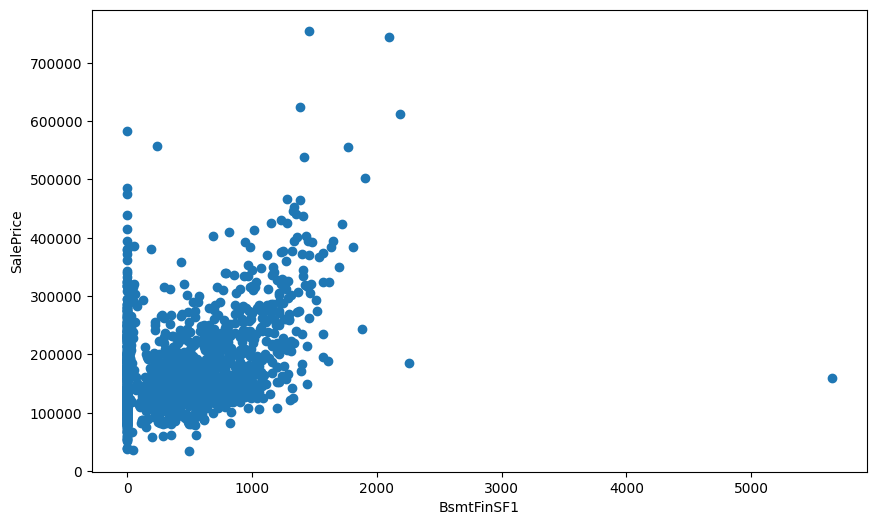

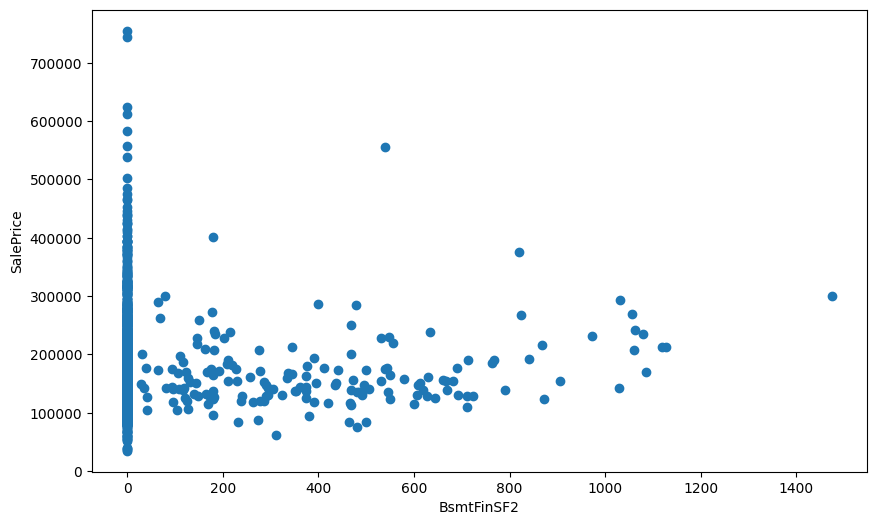

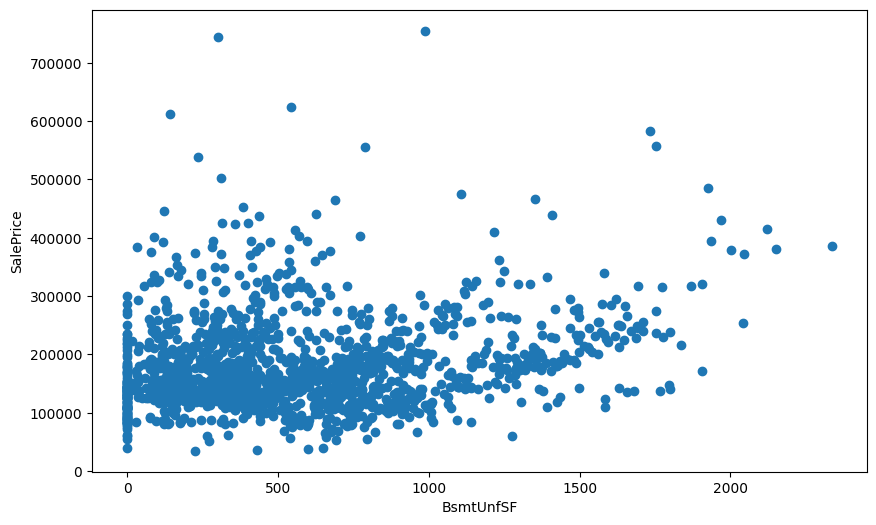

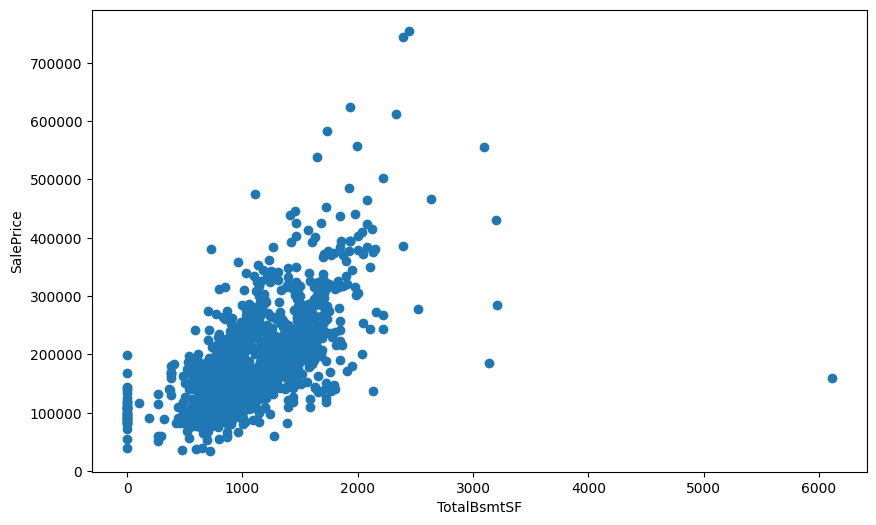

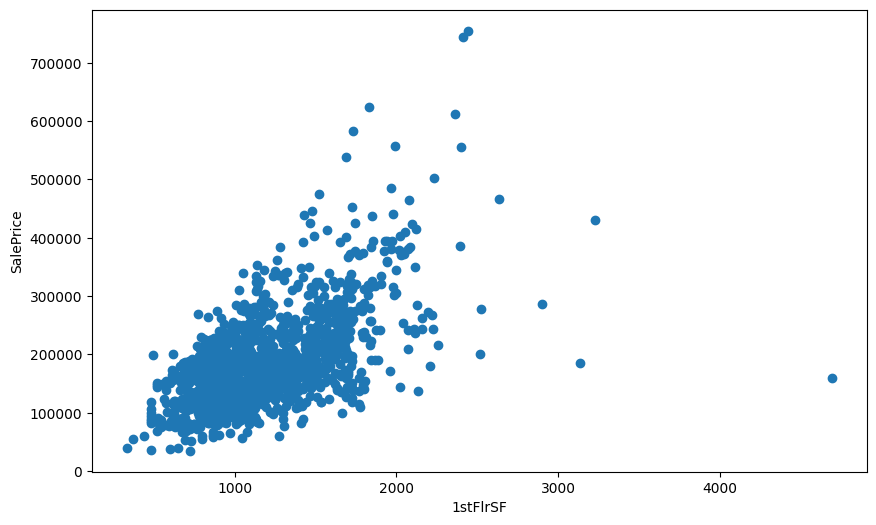

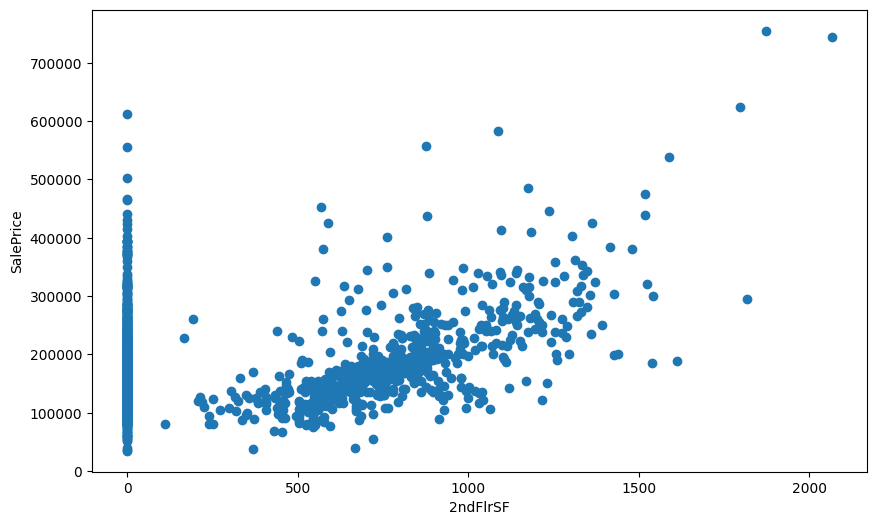

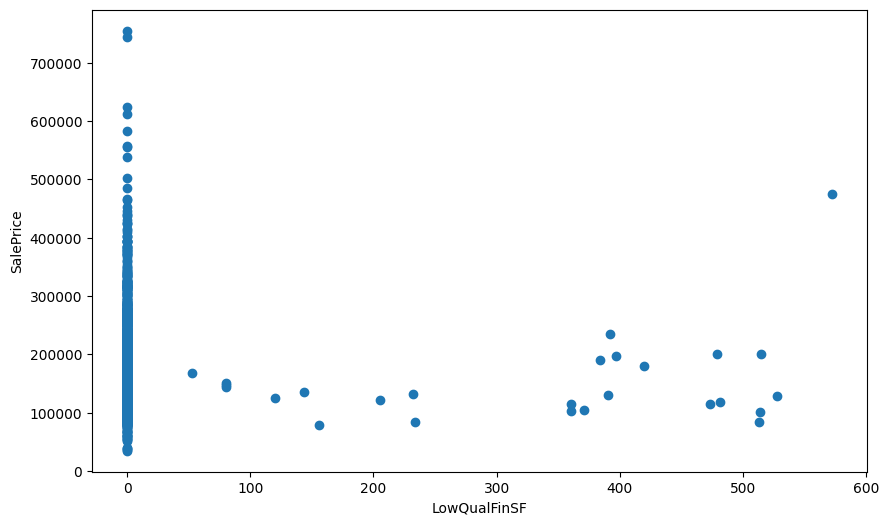

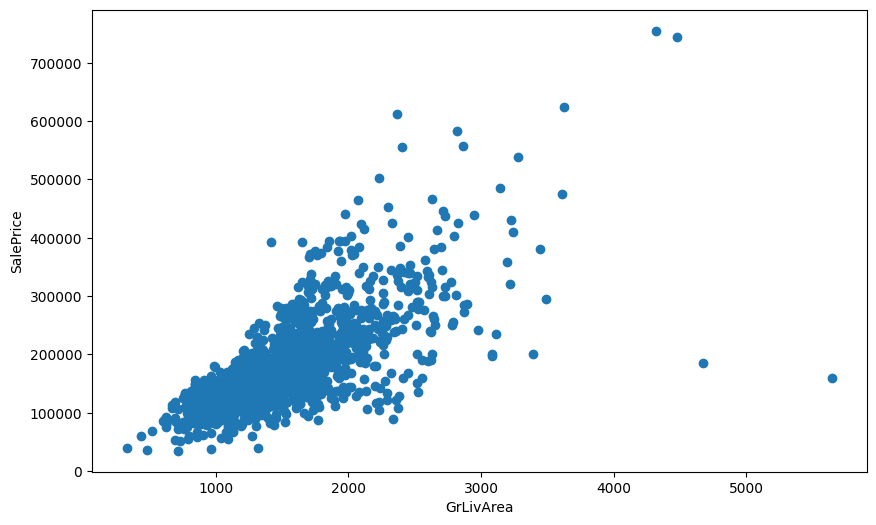

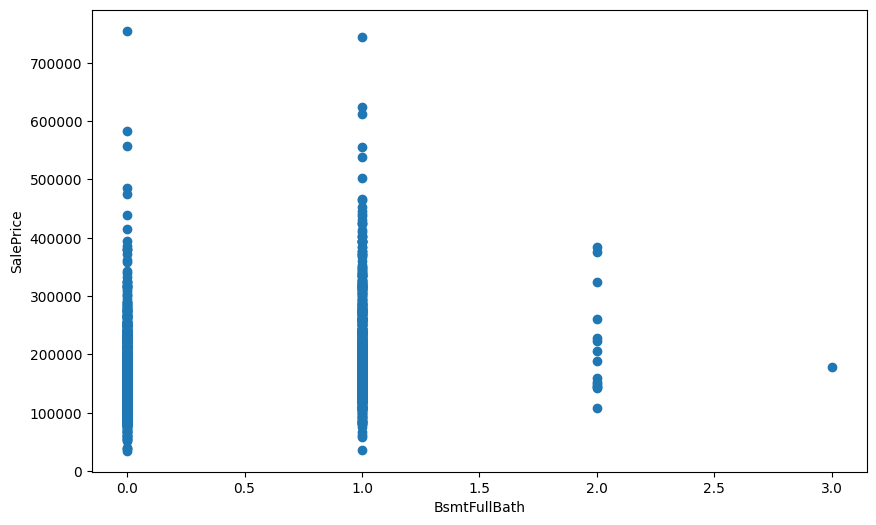

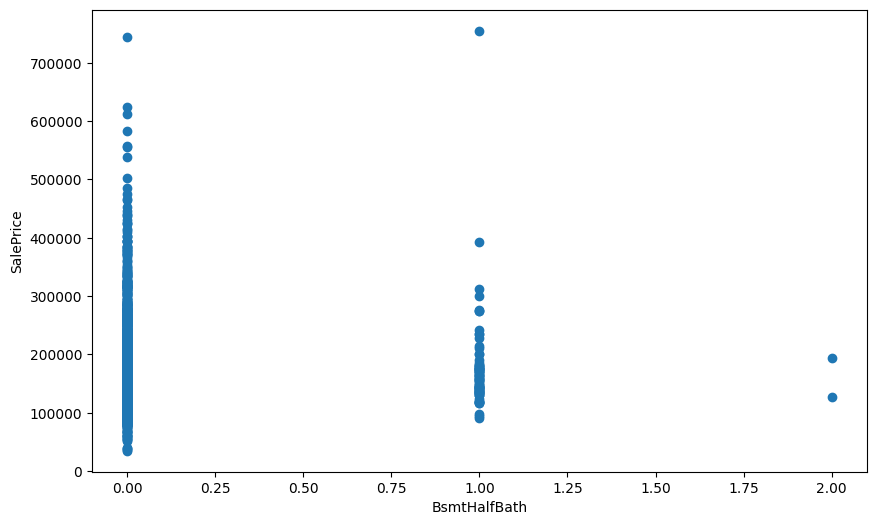

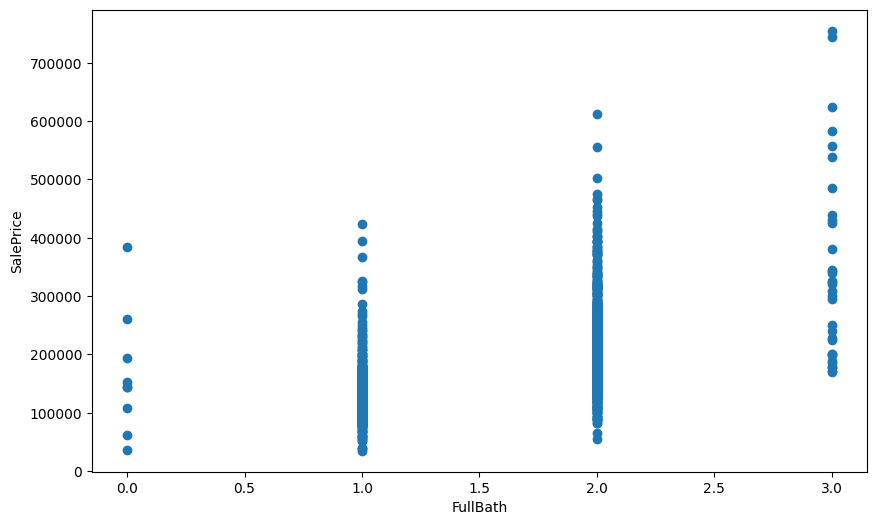

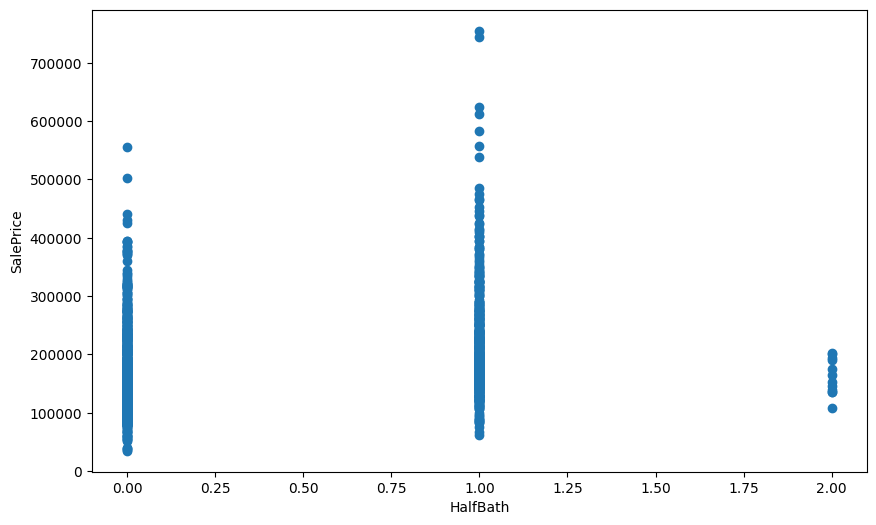

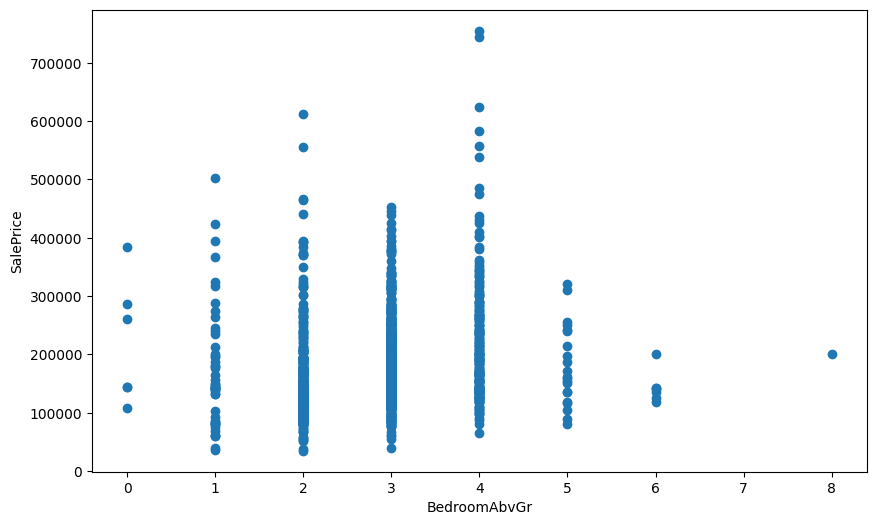

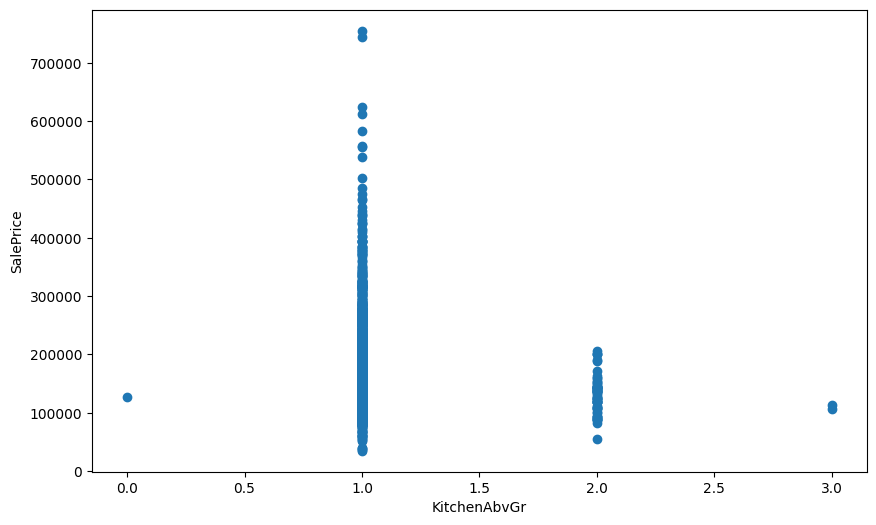

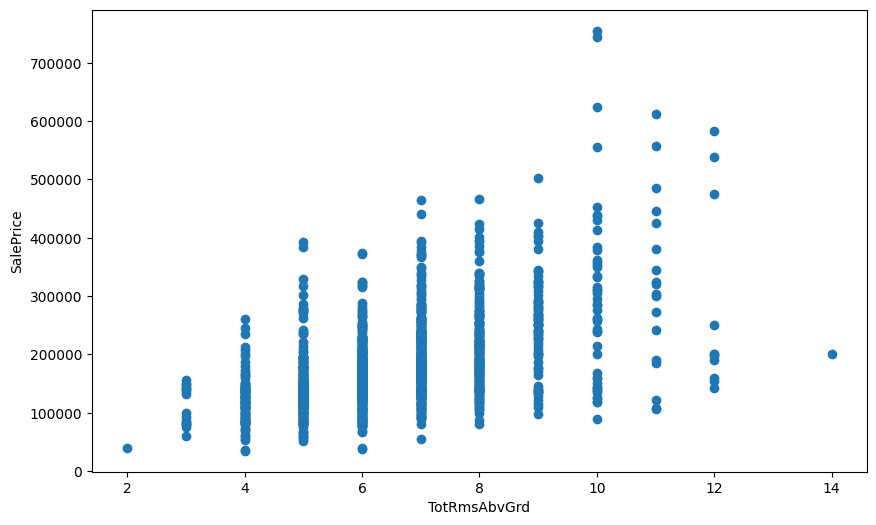

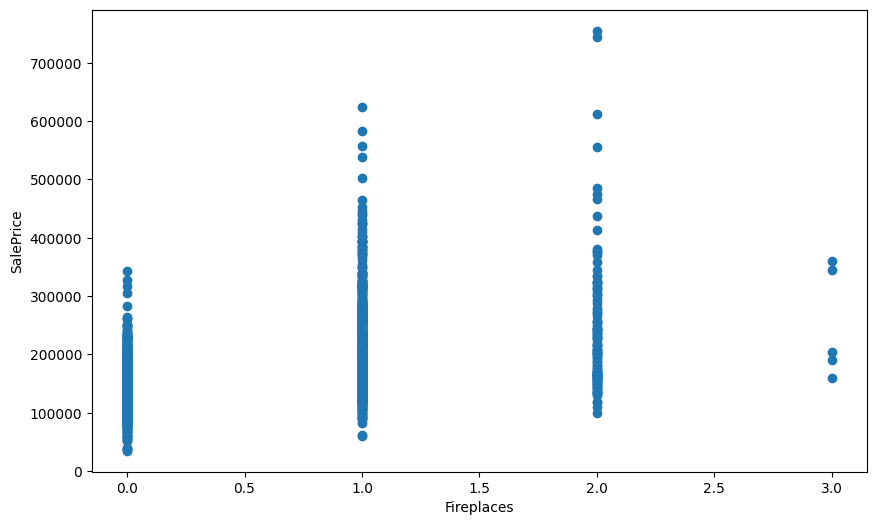

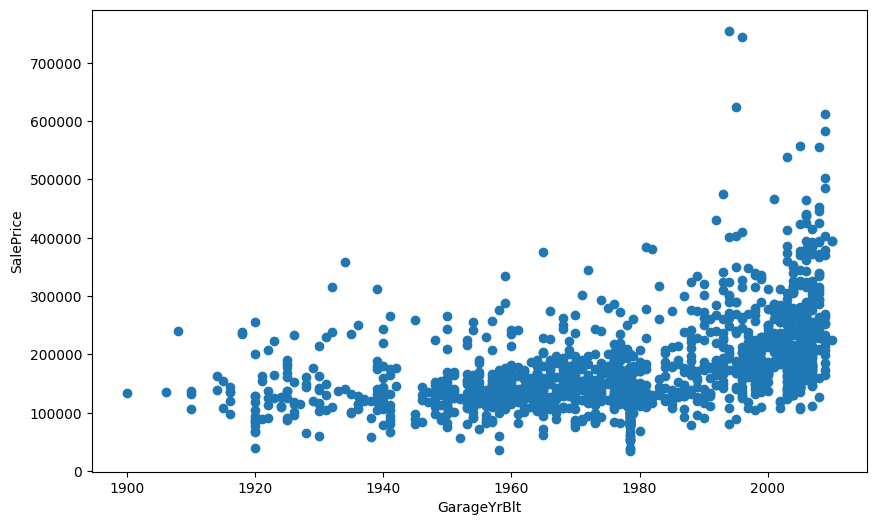

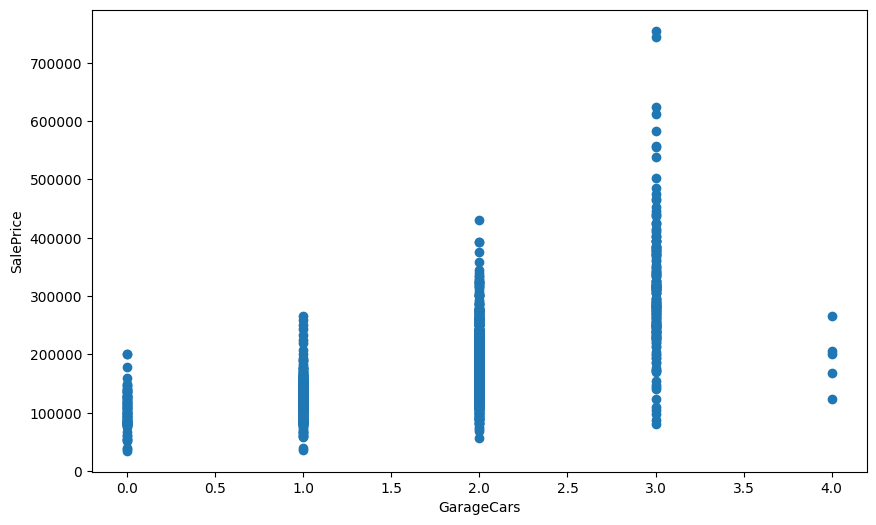

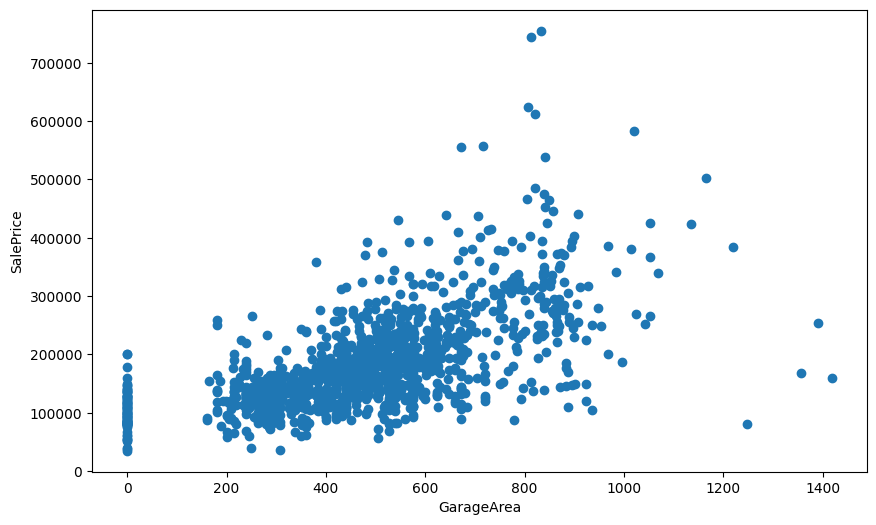

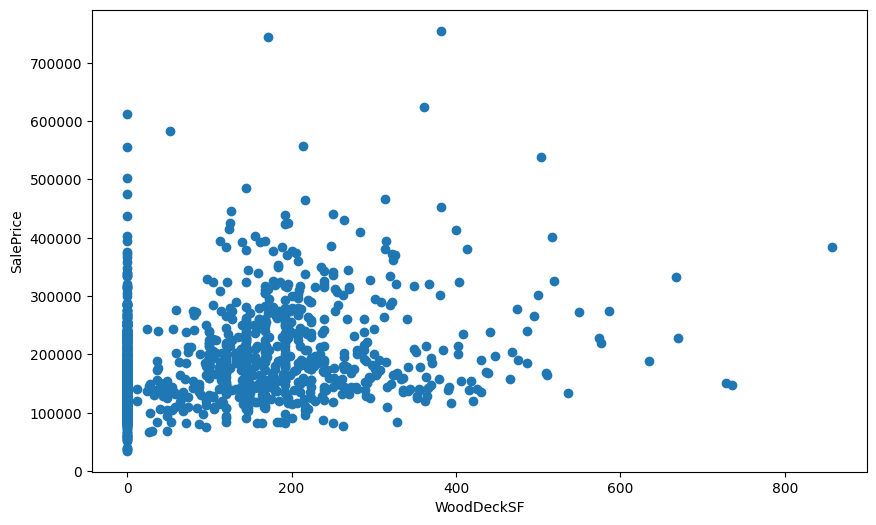

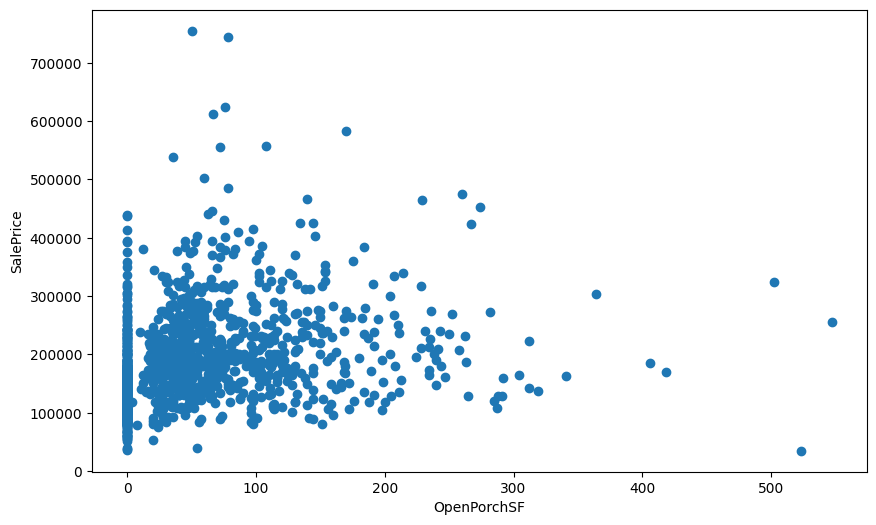

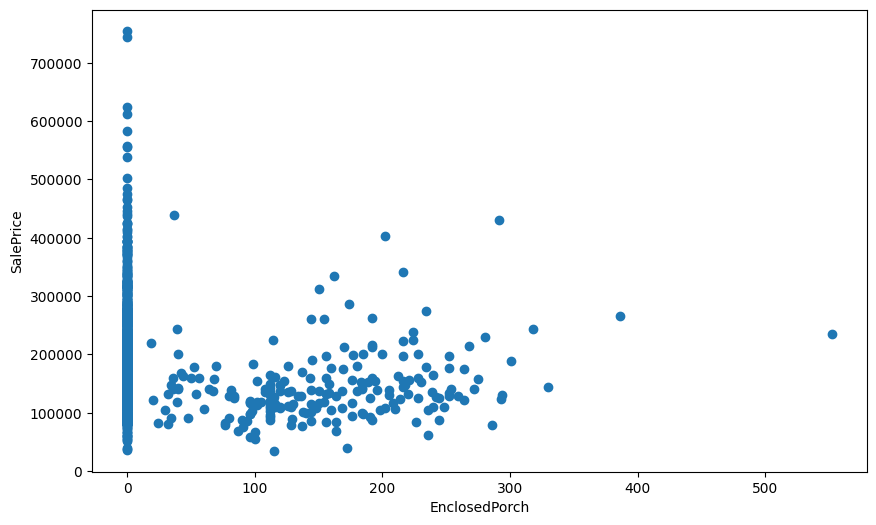

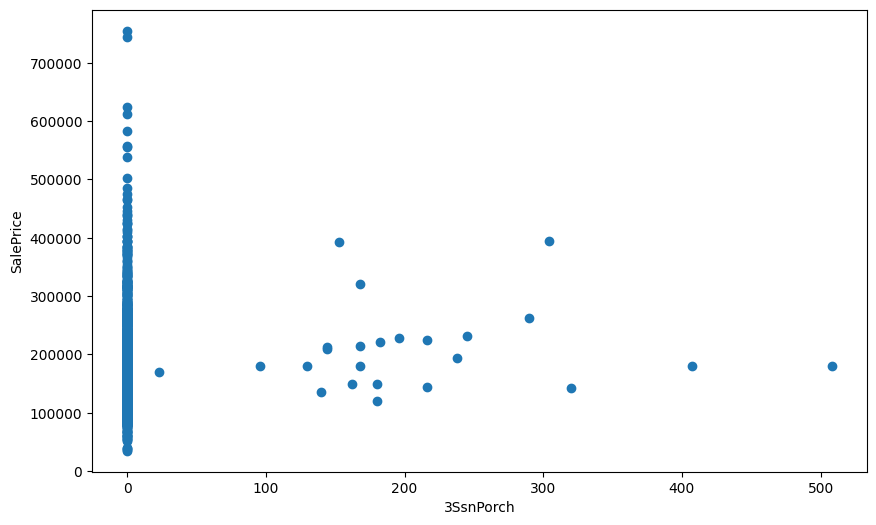

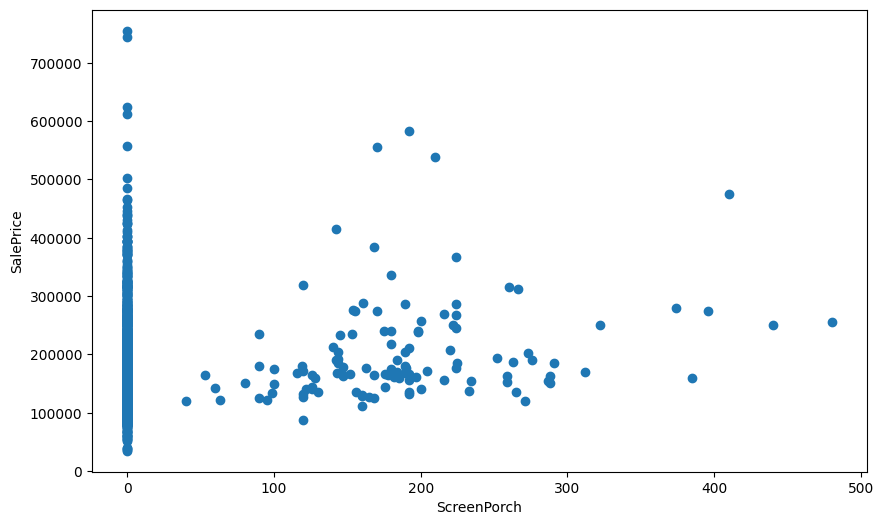

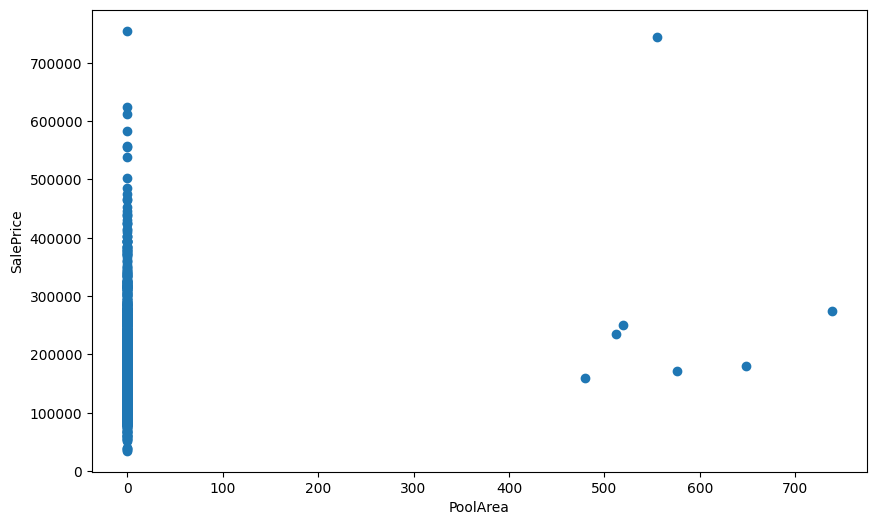

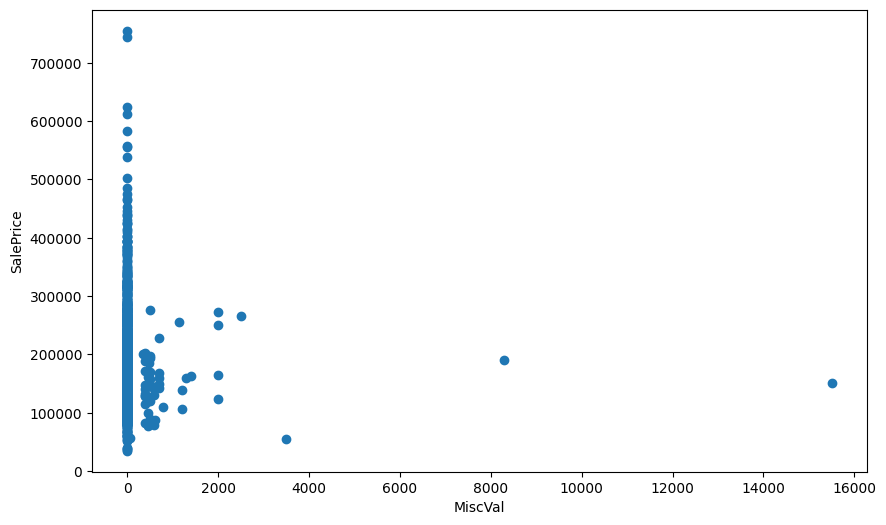

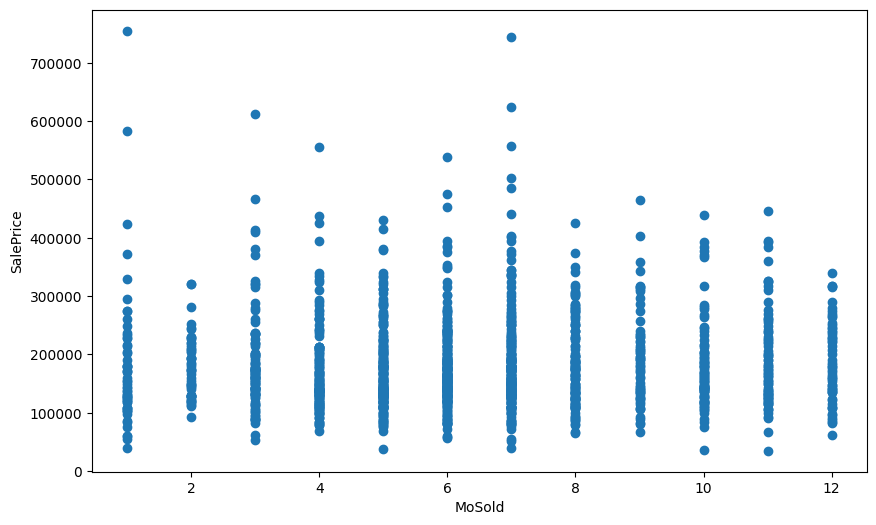

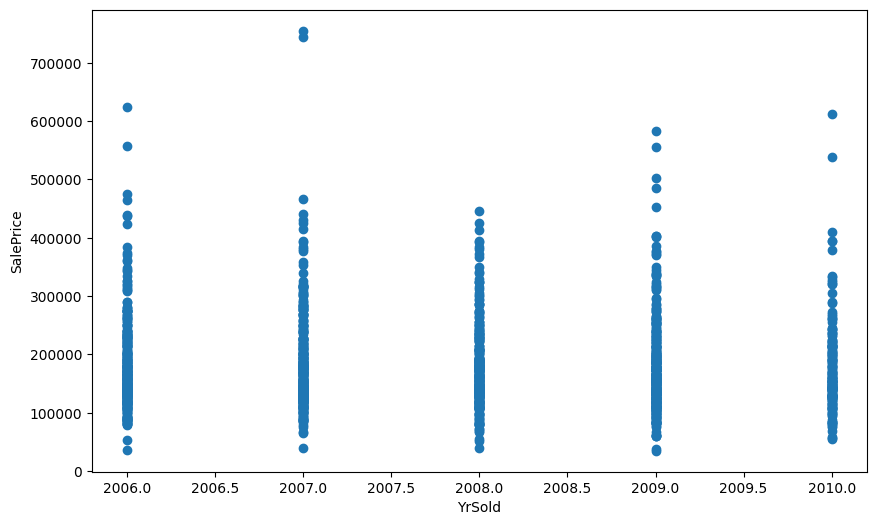

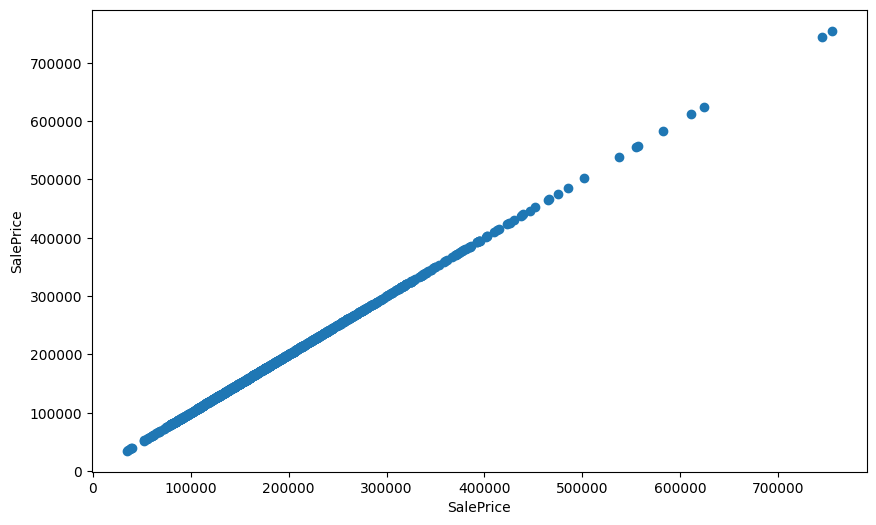

In [235]:
for col in numerical_cols:
  plt.figure(figsize=(10,6))
  plt.scatter(df[col],df['SalePrice'])
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.show()

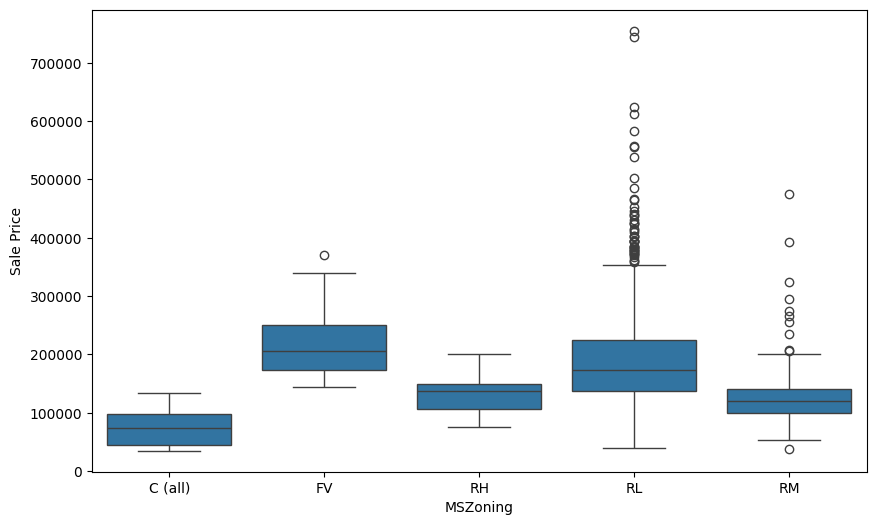

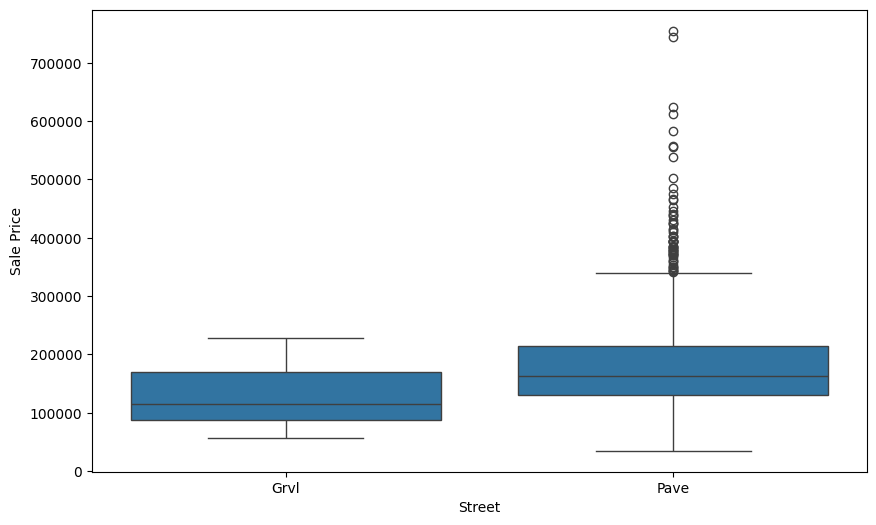

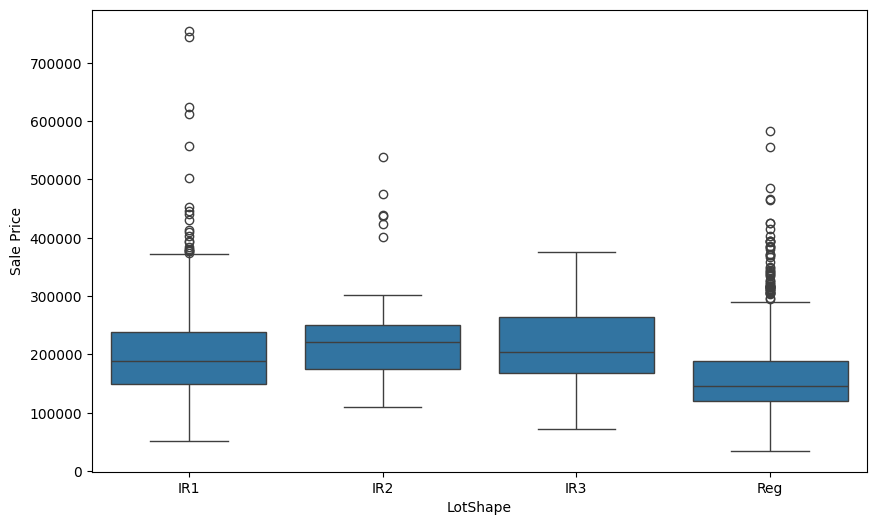

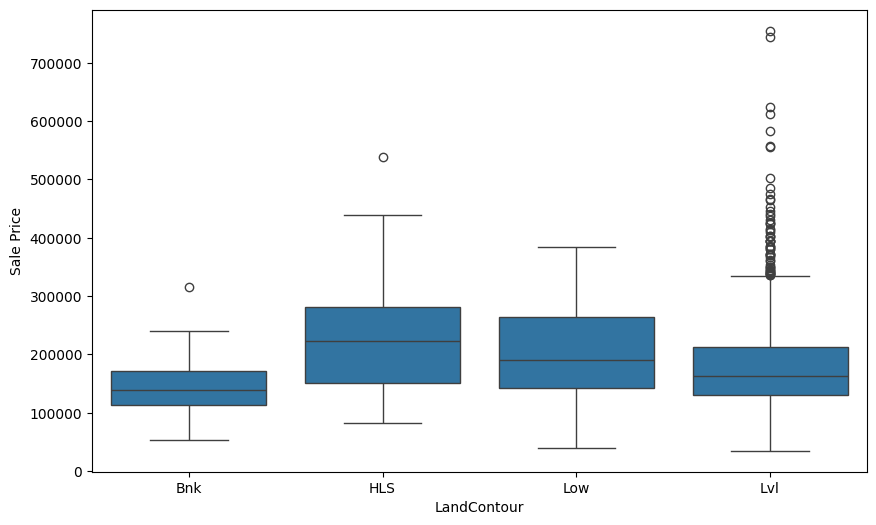

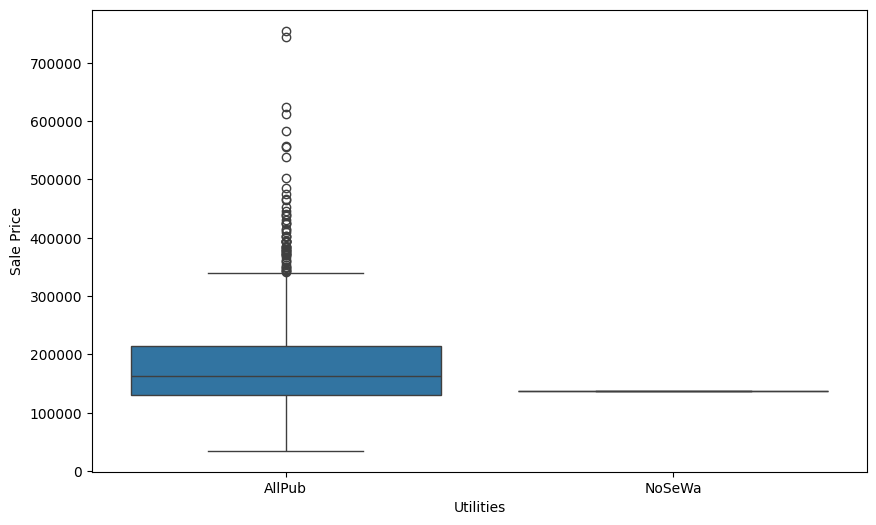

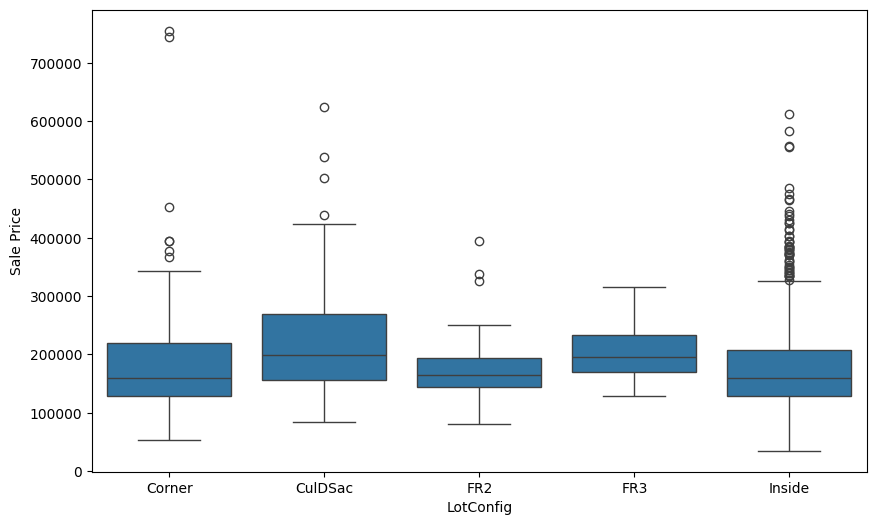

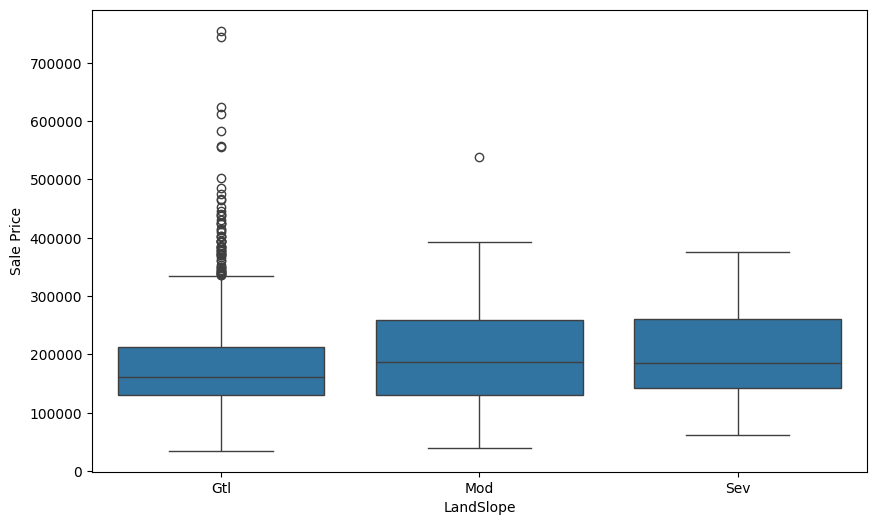

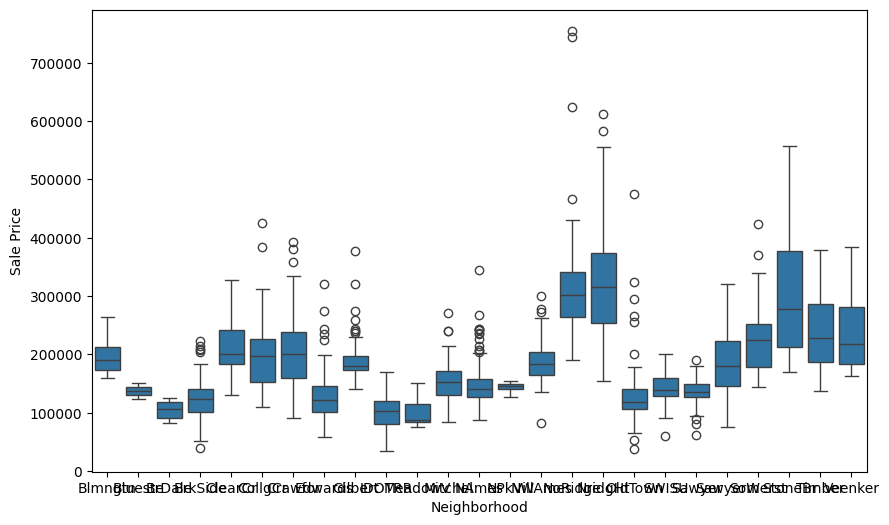

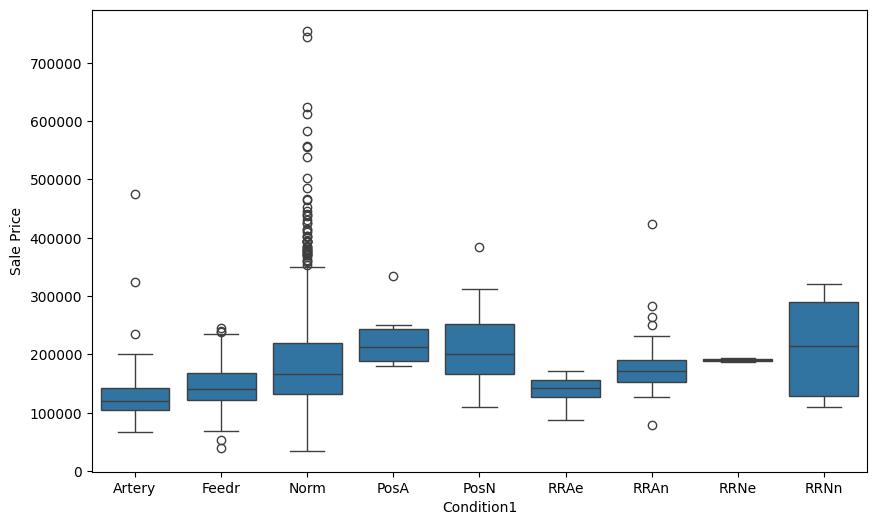

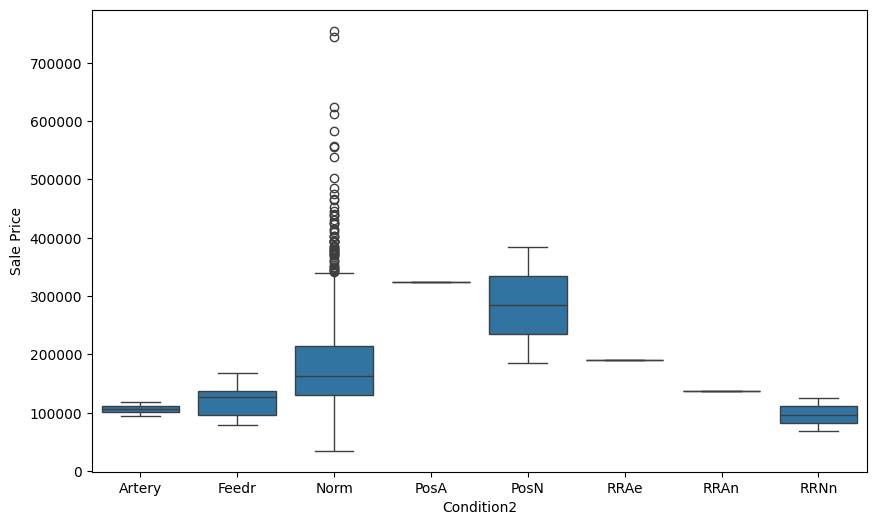

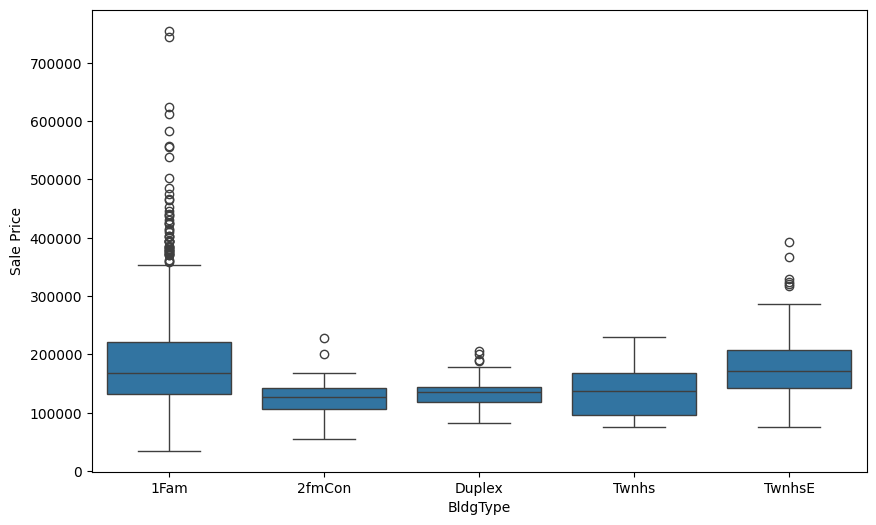

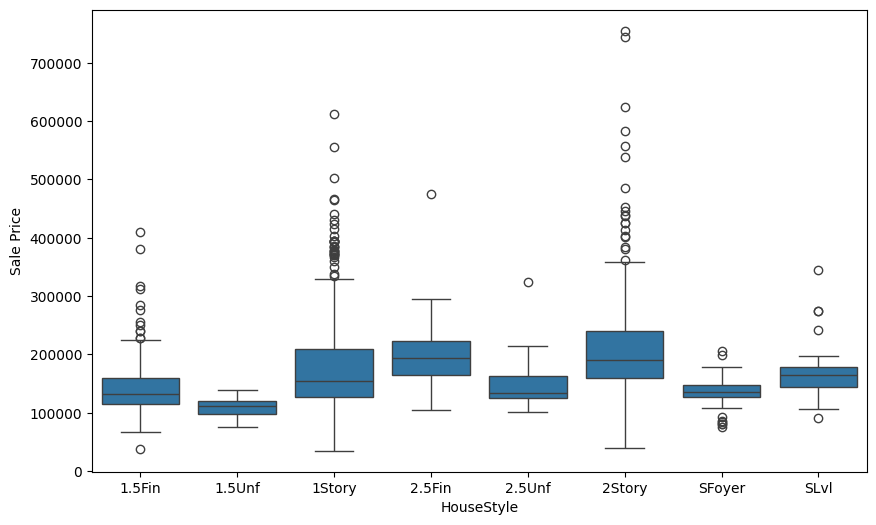

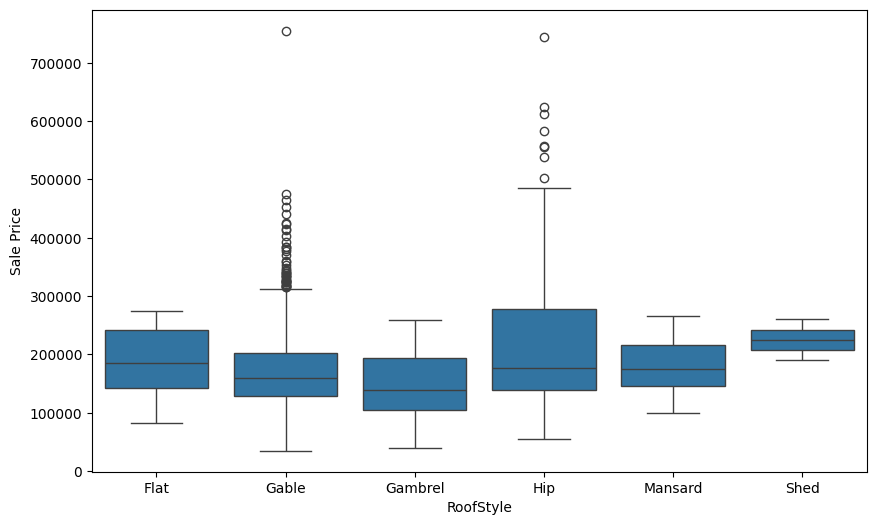

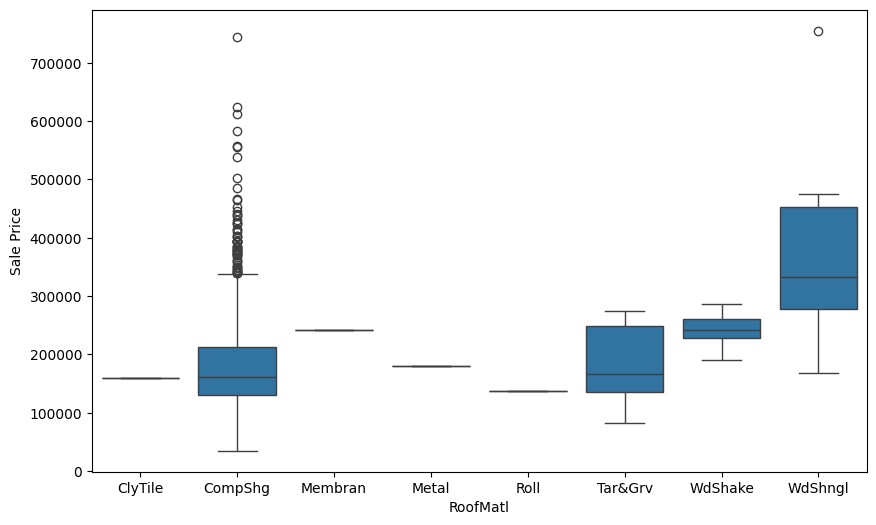

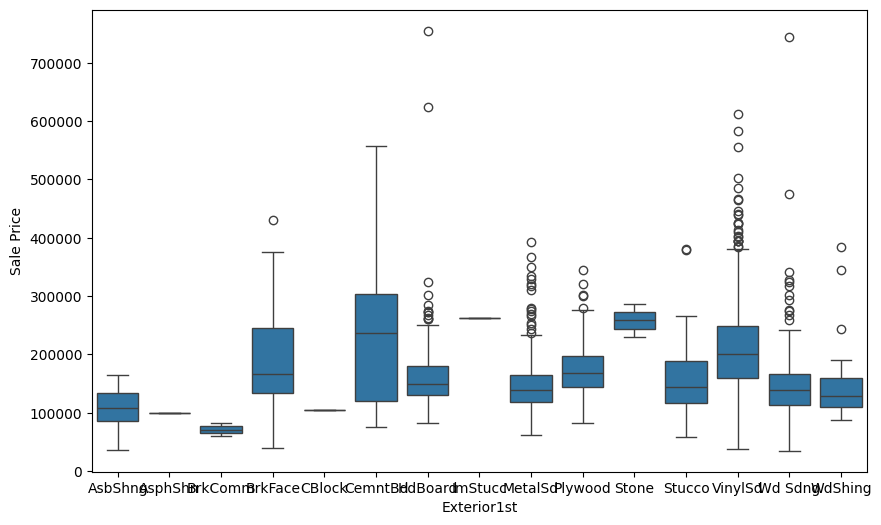

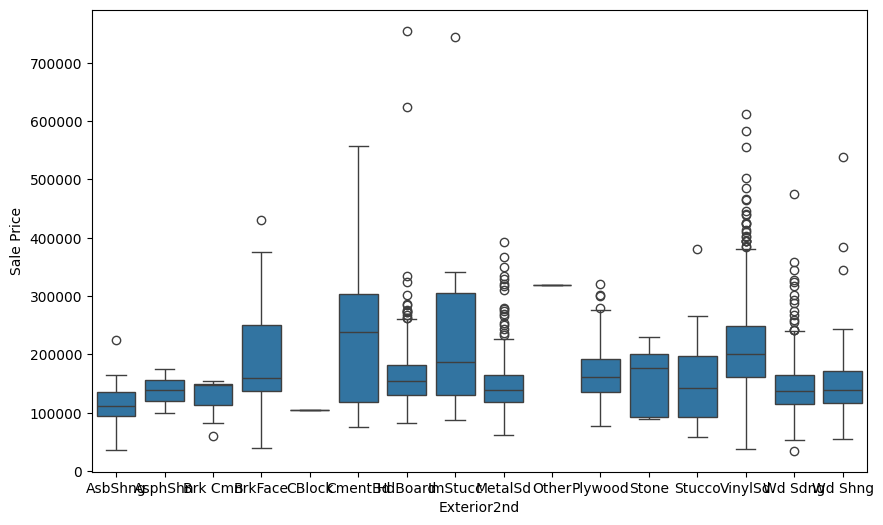

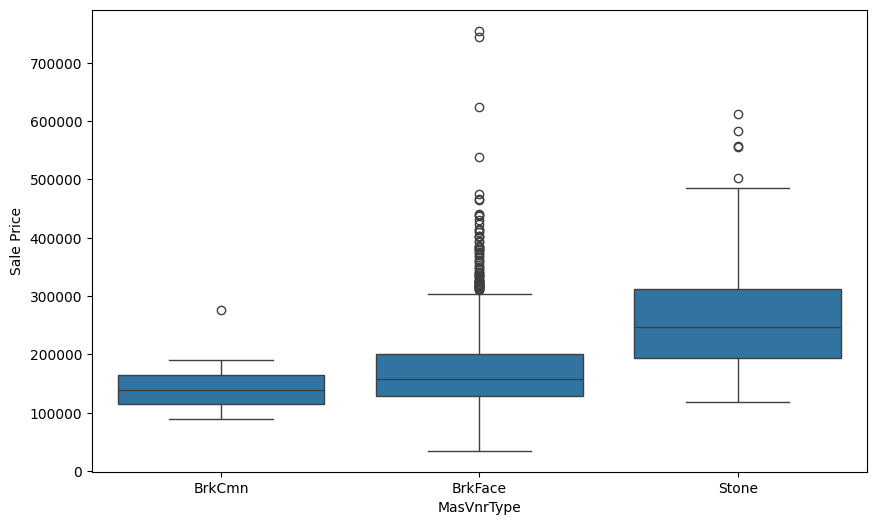

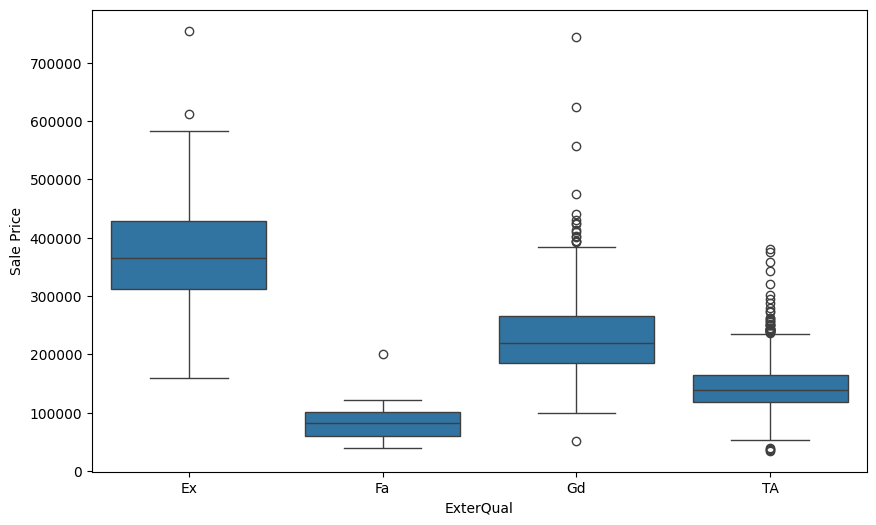

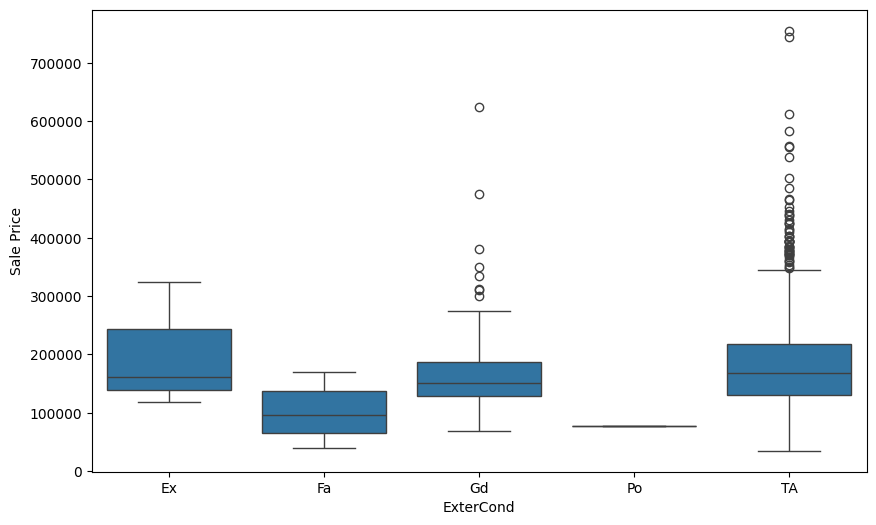

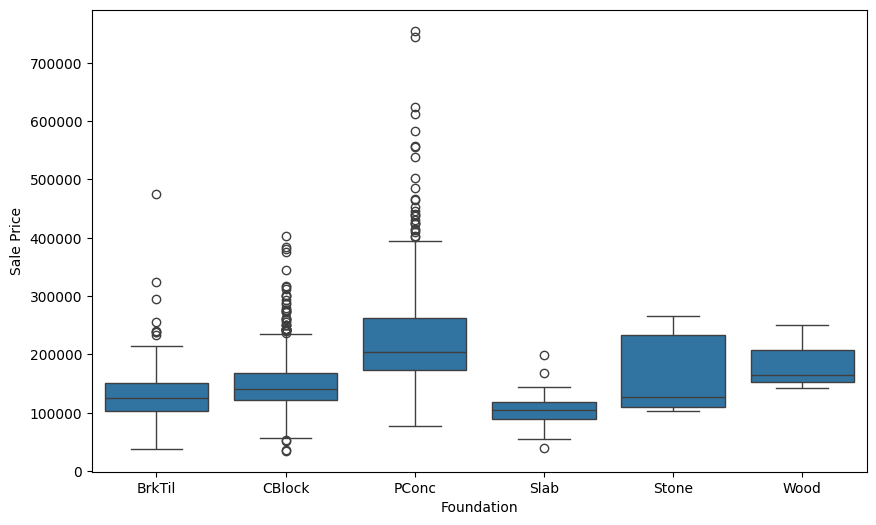

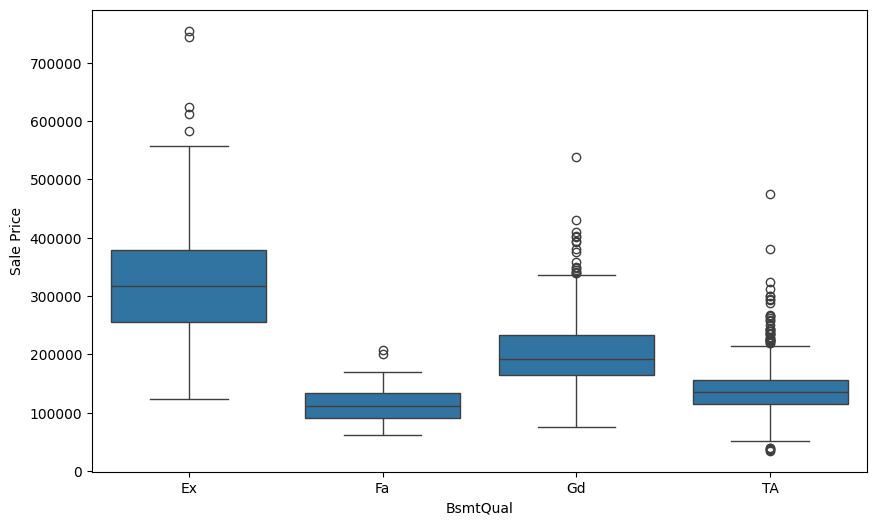

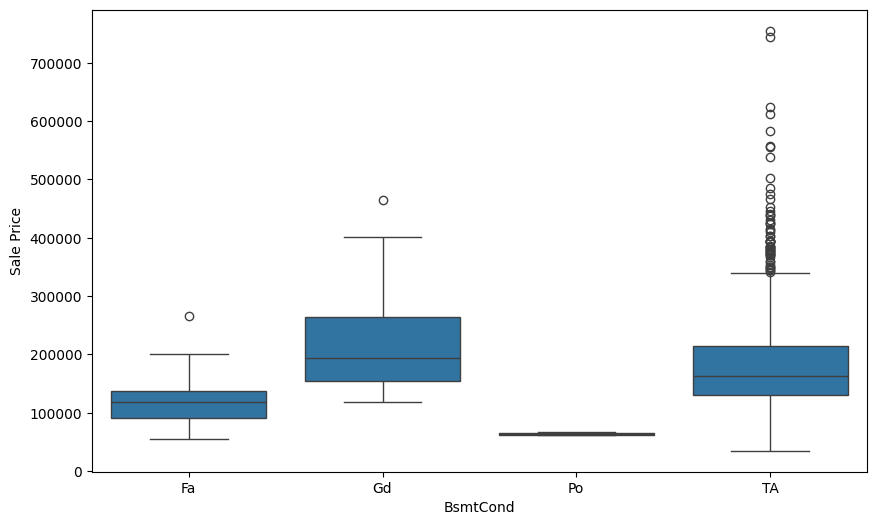

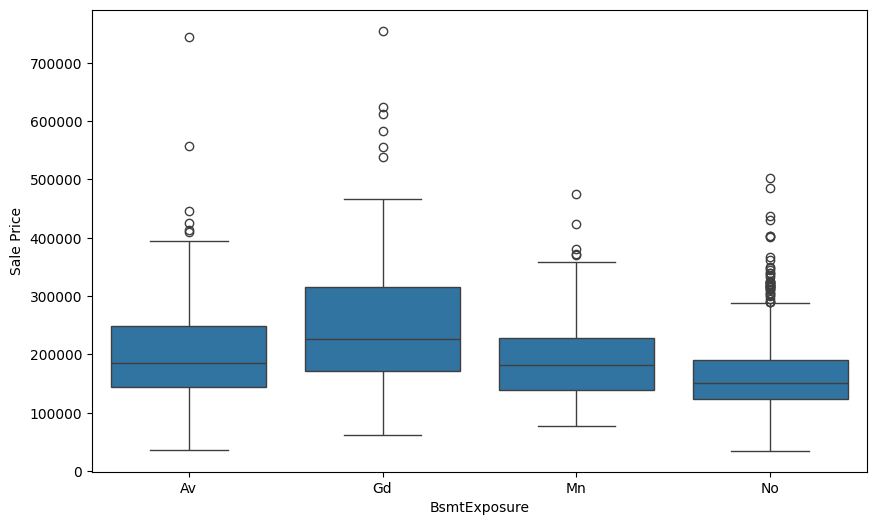

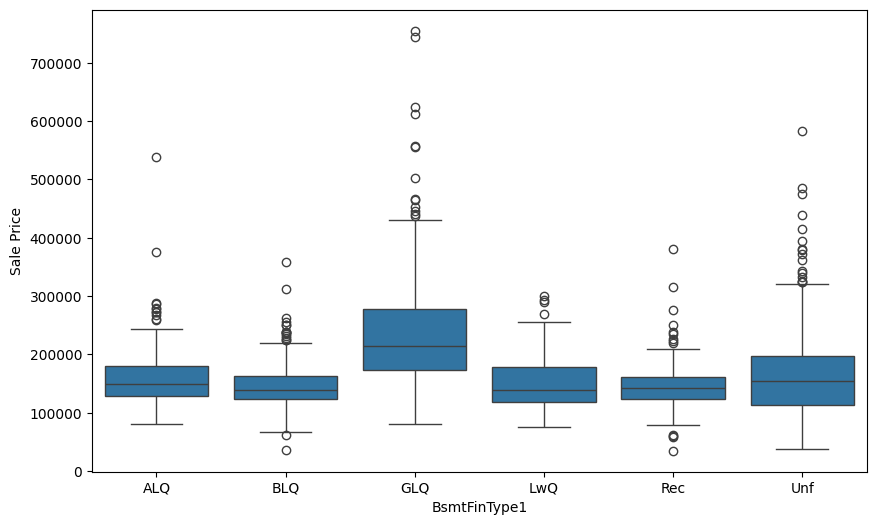

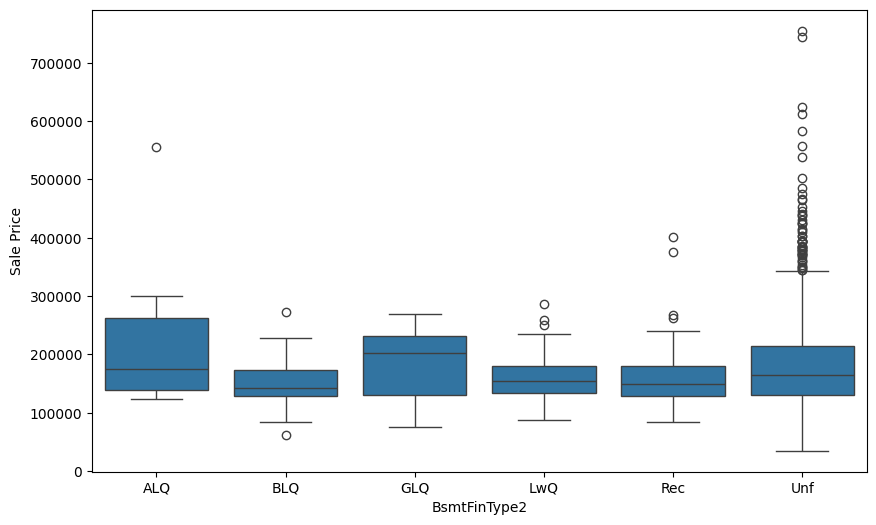

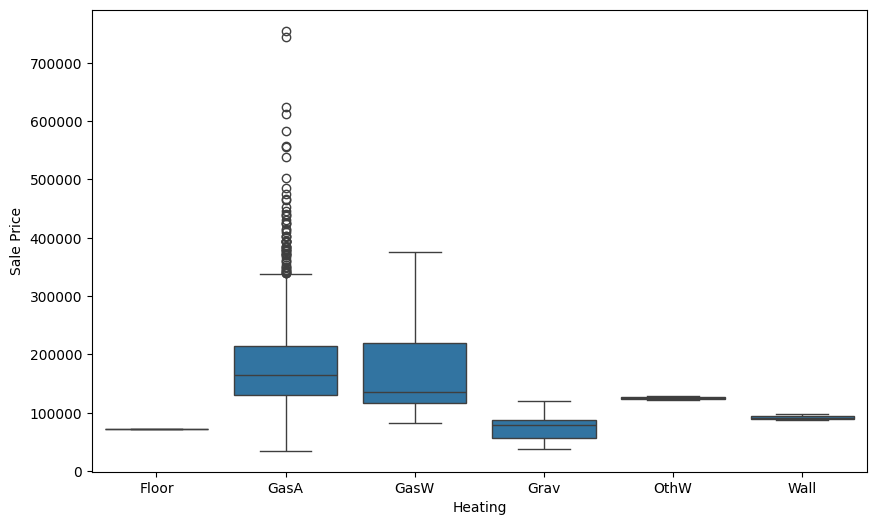

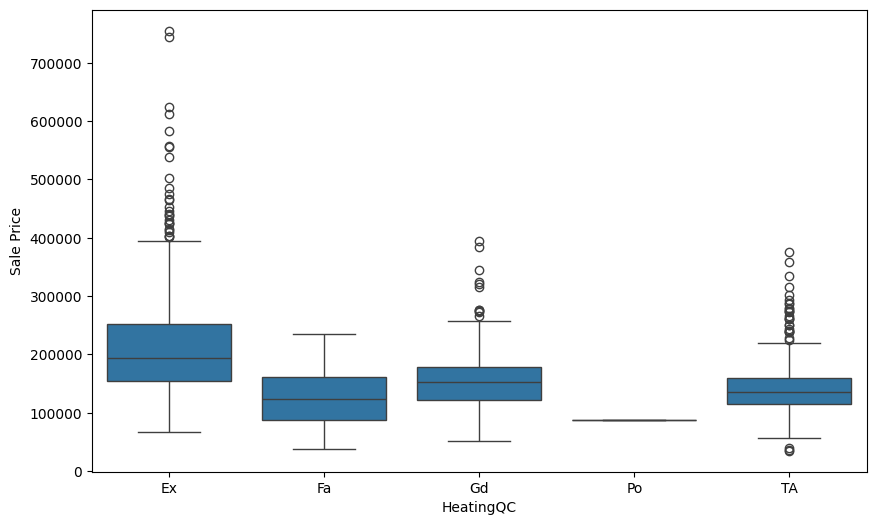

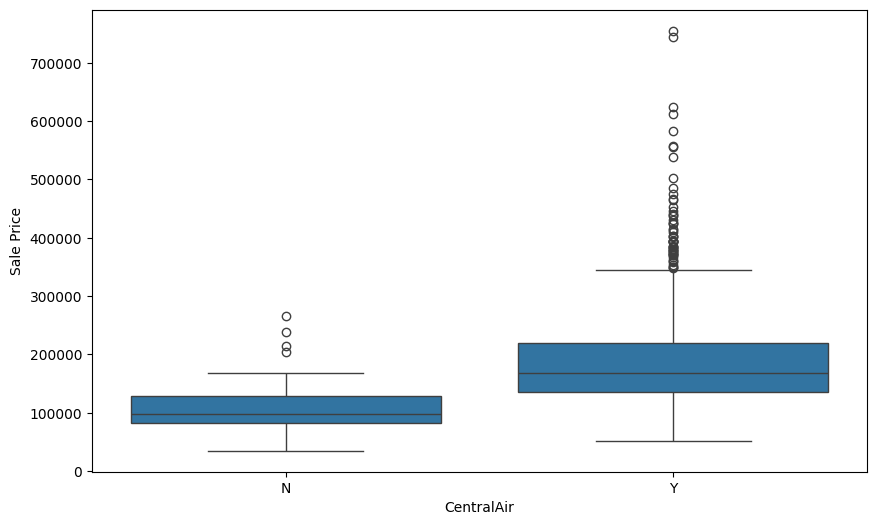

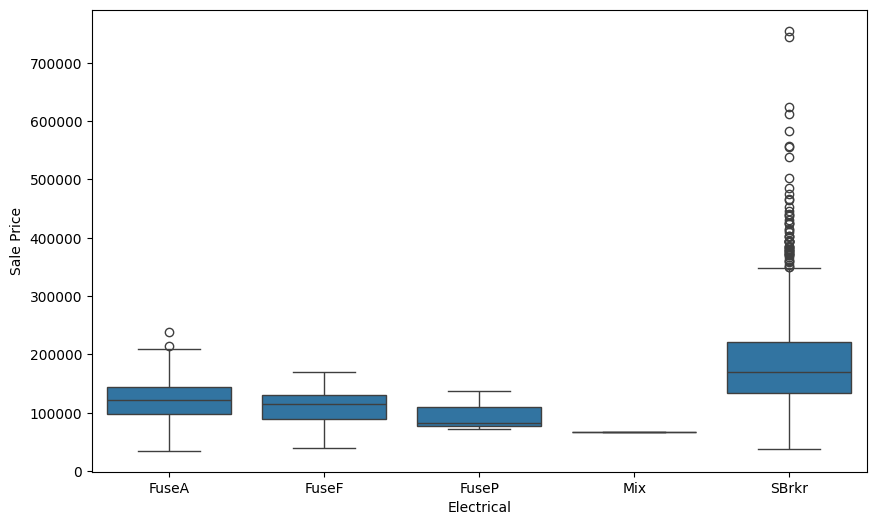

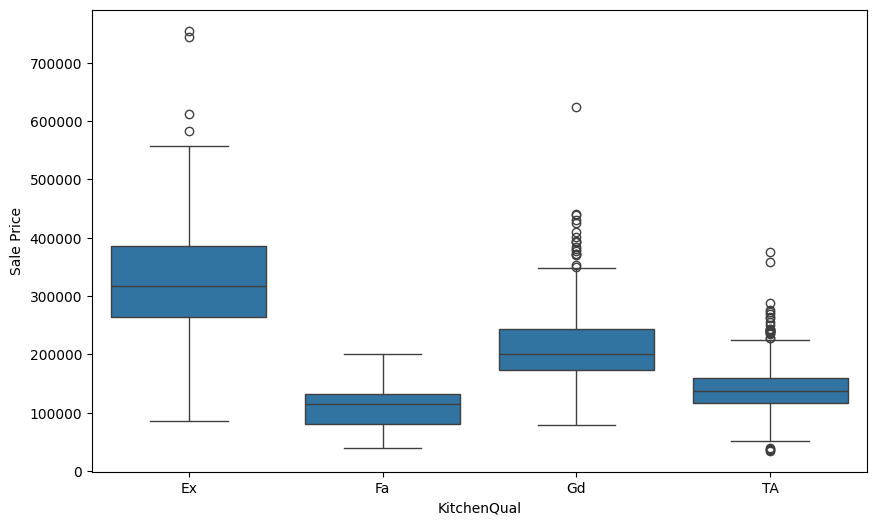

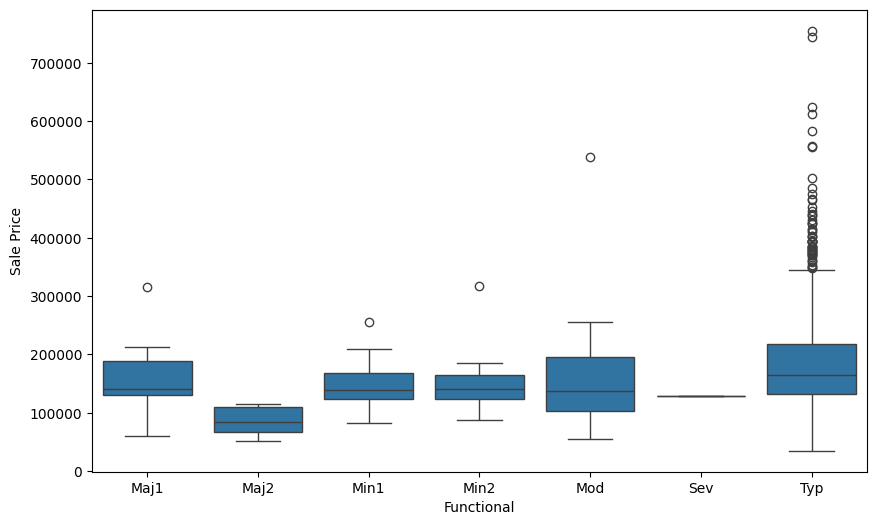

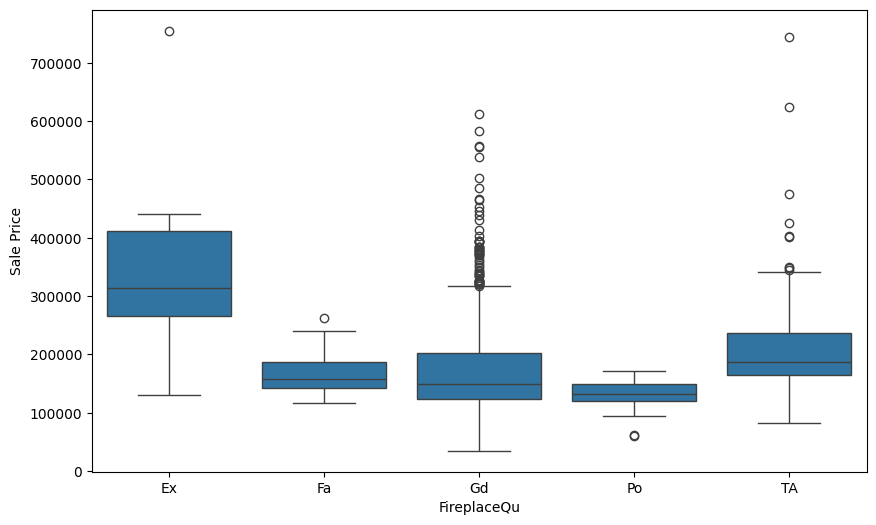

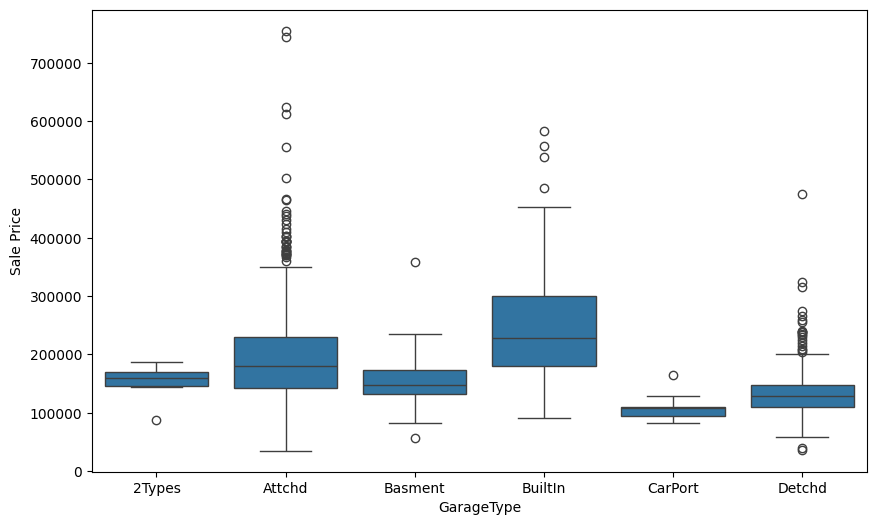

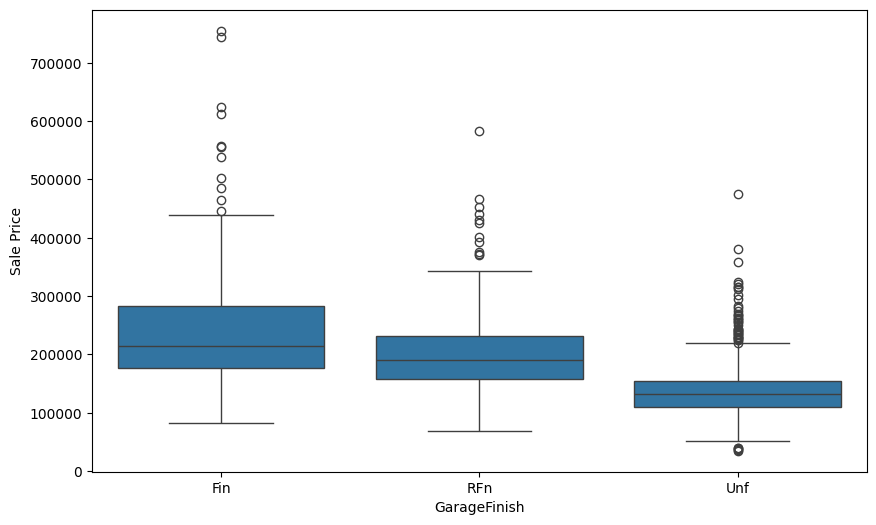

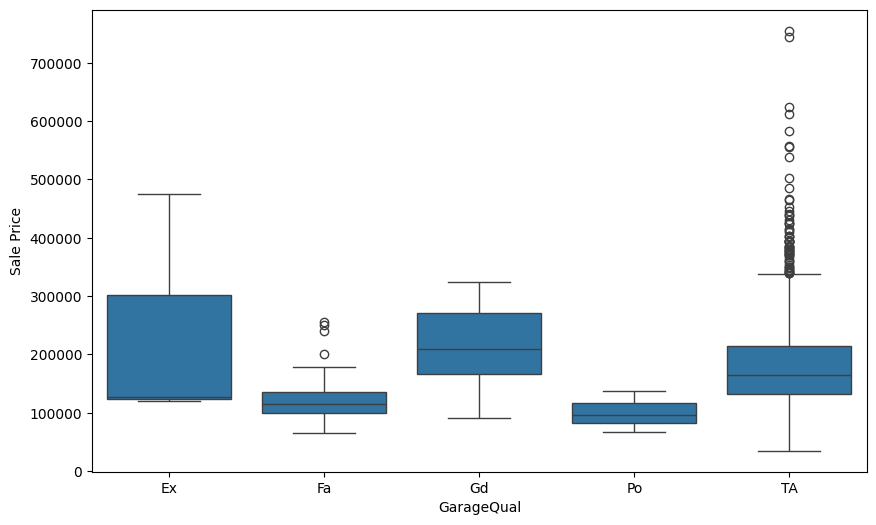

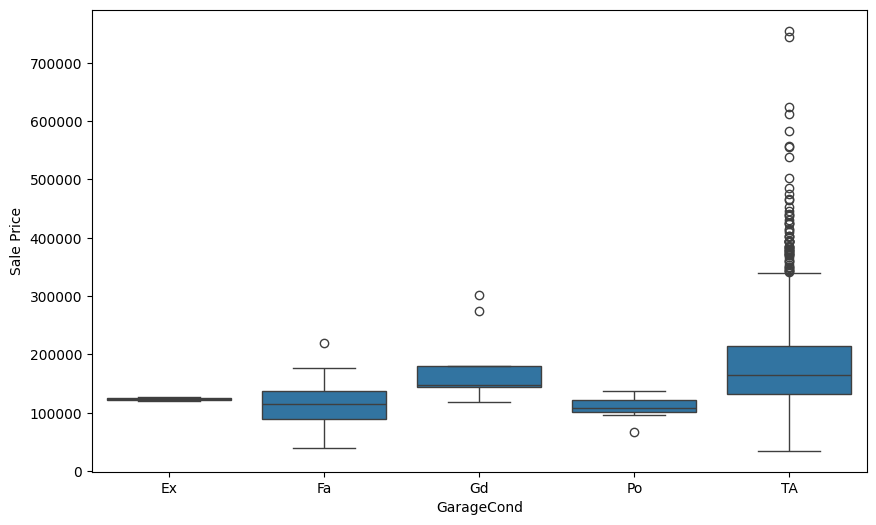

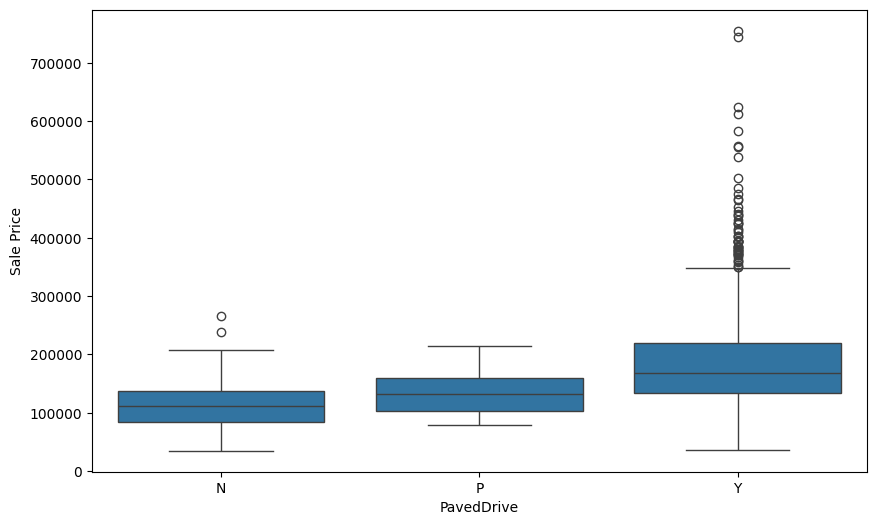

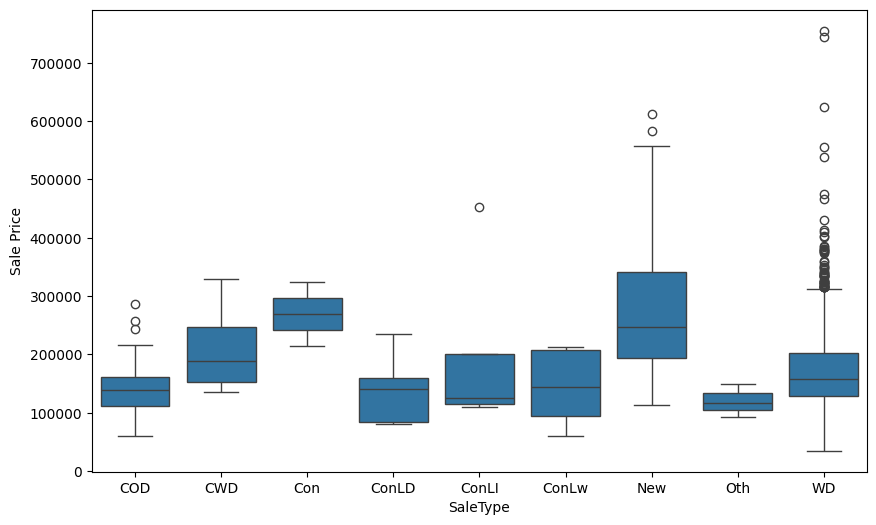

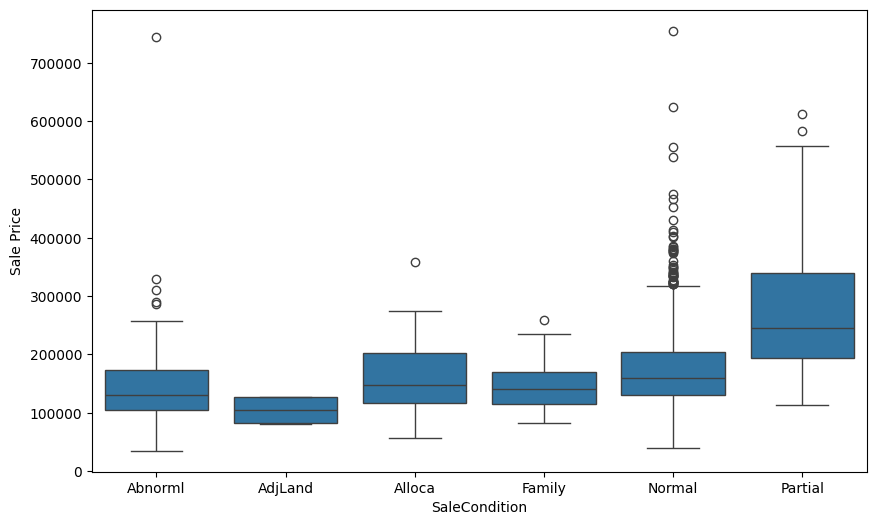

In [236]:
for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col],y=df['SalePrice'])
  plt.xlabel(col)
  plt.ylabel('Sale Price')
  plt.show()

In [237]:
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [238]:
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False


In [239]:
df_encoded.shape

(1460, 237)

## Spliting the dataset
* Now here is where the fun begins.
* 1st step was to slit the datasets then train using diffrent models and see which works better

In [240]:
x=df_encoded.drop('SalePrice',axis=1)
y=df_encoded['SalePrice']

In [241]:
X_train,X_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

## Training using XgBoost

In [242]:
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [243]:
y_pred=xgb_model.predict(X_test)

In [244]:
xgb_model.score(X_test,y_test)

0.8891330117503062

## A function for Evaluation,which helps reduce repeating coding

In [252]:
def evaluation_metrics(model, X_test, y_test, y_pred):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    model_score = model.score(X_test, y_test)
    msr = mean_squared_error(y_test, y_pred)
    rmsr = np.sqrt(msr)
    mae = mean_absolute_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)

    metrics = {
        'Metrics': ['Model Score', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R2 Score'],
        'Values': [model_score, msr, rmsr, mae, score]
    }

    results = pd.DataFrame(metrics)
    return results

In [254]:
evaluation_metrics(xgb_model,X_test,y_test,y_pred)

,Metrics,Values
0,Model Score,8.891330e-01
1,Mean Squared Error,8.503860e+08
2,Root Mean Squared Error,2.916138e+04
3,Mean Absolute Error,1.819048e+04
4,R2 Score,8.891330e-01


## Training using Random Forest Regressor

In [255]:
r_forest=RandomForestRegressor()
r_forest.fit(X_train,y_train)


RandomForestRegressor()

In [258]:
evaluation_metrics(r_forest,X_test,y_test,y_pred)

,Metrics,Values
0,Model Score,8.860194e-01
1,Mean Squared Error,8.742682e+08
2,Root Mean Squared Error,2.956803e+04
3,Mean Absolute Error,1.759033e+04
4,R2 Score,8.860194e-01


In [259]:
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [260]:
randomSearchcv=RandomizedSearchCV(estimator=r_forest,
                                 param_distributions=param_grid,
                                  n_iter=50,
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2,
                                  random_state=42)

In [261]:
# randomSearchcv.fit(X_train,y_train)

In [262]:
# randomSearchcv.best_params_

In [263]:
# randomSearchcv.best_score_

In [265]:
r_forest=RandomForestRegressor(n_estimators=1400,min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='sqrt',
                               max_depth=90,
                               bootstrap=False)
r_forest.fit(X_train,y_train)
evaluation_metrics(r_forest,X_test,y_test,y_pred)


,Metrics,Values
0,Model Score,8.790840e-01
1,Mean Squared Error,9.274653e+08
2,Root Mean Squared Error,3.045432e+04
3,Mean Absolute Error,1.730000e+04
4,R2 Score,8.790840e-01


## Training using Decision Trees

In [266]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
evaluation_metrics(dt,X_test,y_test,y_pred)

,Metrics,Values
0,Model Score,7.351684e-01
1,Mean Squared Error,2.031345e+09
2,Root Mean Squared Error,4.507044e+04
3,Mean Absolute Error,2.766112e+04
4,R2 Score,7.351684e-01


## Standadizing the Features Columns
* The following models work well when they are standadized

In [267]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training using Linear Regressor

In [268]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [269]:
evaluation_metrics(lr,X_test,y_test,y_pred)

,Metrics,Values
0,Model Score,-1.665436e+12
1,Mean Squared Error,1.277444e+22
2,Root Mean Squared Error,1.130241e+11
3,Mean Absolute Error,6.621440e+09
4,R2 Score,-1.665436e+12


## Training using Kneighbourd

In [270]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
evaluation_metrics(knn,X_test,y_test,y_pred)

,Metrics,Values
0,Model Score,7.311258e-01
1,Mean Squared Error,2.062353e+09
2,Root Mean Squared Error,4.541314e+04
3,Mean Absolute Error,2.561152e+04
4,R2 Score,7.311258e-01


knn_df=pd.Dataframe